# Exploring Music Trends and Genres: A Data-Driven Approach with Spotify

#### Team
`Akanksha`  
Individual Project  
I513 Usable AI, Spring 2025

#### Introduction
This project explores musical trends and audio feature patterns across 15,000+ classic hit songs using Spotify's API data. The goal is to analyze how music characteristics have evolved over time, uncover what defines a hit song, and build predictive models and a basic recommender system.


#### Dataset
I’m a big-time metalhead and just love listening to music in general. So for this project, I thought it would be cool to dive into Spotify data. I’m using a dataset that has 15,150 classic hit songs from 3,083 artists, covering a huge time span from 1923 to 2023. The songs are split into 19 different genres and come with detailed Spotify audio features like danceability, energy, tempo, valence, popularity, time signature, and more. This dataset is publicly available on Kaggle and was created by a user named ‘The Bumpin’, who extracted these classic hits using Spotify’s Web API.

#### Source
https://www.kaggle.com/datasets/thebumpkin/10400-classic-hits-10-genres-1923-to-2023/data

---

#### Key Questions
- What characteristics define a hit song across different decades?
- How have musical trends (e.g., tempo, loudness, key signature, etc.) evolved over time?
- What’s the most popular key signature, tempo or song length in music?
- Can we predict song popularity based on audio features?
- Can we create an effective song recommender system using these features?

---
#### Hypotheses
- Songs with higher danceability, energy, and valence are more likely to be popular.  
*Reasoning: Catchy, upbeat songs tend to perform better on streaming platforms.*  
-  Over the past century, tempo and loudness have increased in popular music.  
*Reasoning: Modern production techniques favor louder, high-energy songs compared to older, softer compositions.*  
- Certain audio features (e.g., acousticness, instrumentalness) are more dominant in specific decades.  
*Reasoning: Early 20th-century music had more acoustic elements, while recent decades favor electronic production.*  
- Some genres (e.g., pop & dance, rock & metal) share more similarities in audio features than others.  
*Reasoning: Certain musical styles naturally overlap in characteristics, leading to possible cross-genre recommendations.*

---

## Setting up the Environment

In [39]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Loading the Spotify Classic Hits Dataset

In [40]:
# Loading the dataset
df_classic_hits = pd.read_csv('Datasets/classic-hits.csv')

## Data Familiarization

In [41]:
df_classic_hits.head()

Track          Artist  Year  Duration  Time_Signature  \
0         Hey Jack Kerouac  10,000 Maniacs  1987    206413               4   
1         Like the Weather  10,000 Maniacs  1987    236653               4   
2  What's the Matter Here?  10,000 Maniacs  1987    291173               4   
3               Trouble Me  10,000 Maniacs  1989    193560               4   
4    Candy Everybody Wants  10,000 Maniacs  1992    185960               4   

   Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0         0.616   0.511    6   -15.894     1       0.0279       0.03840   
1         0.770   0.459    1   -17.453     1       0.0416       0.11200   
2         0.593   0.816    9    -7.293     1       0.0410       0.00449   
3         0.861   0.385    2   -10.057     1       0.0341       0.15400   
4         0.622   0.876   10    -6.310     1       0.0305       0.01930   

   Instrumentalness  Liveness  Valence    Tempo  Popularity      Genre  
0          0.000000    0.1500    0.604  132.015          40  Alt. Rock  
1          0.003430    0.1450    0.963  133.351          43  Alt. Rock  
2          0.000032    0.0896    0.519   99.978          12  Alt. Rock  
3          0.000000    0.1230    0.494  117.913          47  Alt. Rock  
4          0.006840    0.0987    0.867  104.970          43  Alt. Rock

In [42]:
# Basic shape and info
print("Shape of dataset:", df_classic_hits.shape)

df_classic_hits.info()

Shape of dataset: (15150, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15150 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             15150 non-null  object 
 1   Artist            15150 non-null  object 
 2   Year              15150 non-null  int64  
 3   Duration          15150 non-null  int64  
 4   Time_Signature    15150 non-null  int64  
 5   Danceability      15150 non-null  float64
 6   Energy            15150 non-null  float64
 7   Key               15150 non-null  int64  
 8   Loudness          15150 non-null  float64
 9   Mode              15150 non-null  int64  
 10  Speechiness       15150 non-null  float64
 11  Acousticness      15150 non-null  float64
 12  Instrumentalness  15150 non-null  float64
 13  Liveness          15150 non-null  float64
 14  Valence           15150 non-null  float64
 15  Tempo             15150 non-null  float64
 16  Popularity

### Dataset Overview

- **`Track`**: Name of the song. 
- **`Artist`**: Name of the artist of the song. 
- **`Year`**: Year in which the song was released in. 
- **`Duration`**: The duration of the track in milliseconds.
- **`Time_Signature`**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
- **`Danceability`**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- **`Energy`**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
- **`Key`**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- **`Loudness`**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- **`Mode`**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- **`Speechiness`**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- **`Acousticness`**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- **`Instrumentalness`**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- **`Liveness`**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- **`Valence`**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- **`Tempo`**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- **`Popularity`**: A measure from 0.0 to 1.0 describing how popular a song is. The higher the value is, the more popular that song is.
- **`Genre`**: Genre of the song/track.

Reference: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

### Understanding Column Types

##### Nominal (Categorical, Unordered)
- **`Track`**: Song name *(string identifier — can't used for modeling)*
- **`Artist`**: Artist name *(high-cardinality)*
- **`Genre`**: Genre of the song
- **`Key`**: Musical key (e.g., 0 = C, 1 = C#/Db...) — technically numeric, but nominal in meaning
- **`Mode`**: Major (1) or Minor (0) — binary categorical
- **`Time_Signature`**: Meter (e.g., 3/4, 4/4) — treated as unordered categories here

##### Ordinal (Categorical, Ordered)
- *None explicitly ordinal in this dataset*  
  *(However, if we bin **`Popularity`** into categories like "Low", "Medium", "High", it can become ordinal)*

##### Discrete Numerical (Countable)
- **`Year`**: Release year
- **`Popularity`**: Score from 0 to 100 *(can also be treated as continuous)*
- **`Duration`**: In milliseconds *(technically countable, be may be continuous)*

##### Continuous Numerical (Float or Continuous Values)
- **`Danceability`**: 0.0 – 1.0
- **`Energy`**: 0.0 – 1.0
- **`Loudness`**: Typically −60 to 0 dB
- **`Speechiness`**: 0.0 – 1.0
- **`Acousticness`**: 0.0 – 1.0
- **`Instrumentalness`**: 0.0 – 1.0
- **`Liveness`**: 0.0 – 1.0
- **`Valence`**: 0.0 – 1.0
- **`Tempo`**: Beats per minute (BPM)

## Exploratory Data Analysis (EDA)

### Statistical Summary

In [43]:
df_classic_hits.describe()

Year      Duration  Time_Signature  Danceability        Energy  \
count  15150.000000  1.515000e+04    15150.000000  15150.000000  15150.000000   
mean    1984.709769  2.413028e+05        3.921650      0.574667      0.617691   
std       19.482460  1.057966e+05        0.348322      0.166208      0.239527   
min     1899.000000  2.300000e+04        0.000000      0.000000      0.000098   
25%     1971.000000  1.803700e+05        4.000000      0.461000      0.442000   
50%     1983.000000  2.228525e+05        4.000000      0.582000      0.644000   
75%     1998.000000  2.751530e+05        4.000000      0.696000      0.819000   
max     2024.000000  3.060650e+06        5.000000      0.988000      0.999000   

                Key      Loudness          Mode   Speechiness  Acousticness  \
count  15150.000000  15150.000000  15150.000000  15150.000000  15150.000000   
mean       5.257624     -9.154545      0.696634      0.075791      0.302651   
std        3.569713      4.289558      0.459727      0.077704      0.317793   
min        0.000000    -47.359000      0.000000      0.000000      0.000001   
25%        2.000000    -11.736750      0.000000      0.034325      0.024225   
50%        5.000000     -8.480500      1.000000      0.046400      0.167000   
75%        8.000000     -5.955500      1.000000      0.078400      0.557000   
max       11.000000      0.919000      1.000000      0.950000      0.996000   

       Instrumentalness      Liveness       Valence         Tempo  \
count      15150.000000  15150.000000  15150.000000  15150.000000   
mean           0.091046      0.200062      0.571146    120.664078   
std            0.229075      0.175196      0.250969     29.181107   
min            0.000000      0.012400      0.000000      0.000000   
25%            0.000000      0.091900      0.371000     98.672500   
50%            0.000084      0.130000      0.586000    118.777000   
75%            0.012400      0.257000      0.782000    138.073250   
max            0.987000      0.996000      0.989000    219.973000   

         Popularity  
count  15150.000000  
mean      43.025809  
std       20.788038  
min        0.000000  
25%       28.000000  
50%       44.000000  
75%       59.000000  
max       98.000000

#### Insights

- `Year`  
  - Min year is 1899 and max year is 2024 with median and mean around 1983/1984.  
  - Looks like most of the songs are concentrated around the late 20th century. The dataset spans over a century but is skewed toward more modern music I think.

- `Duration (ms)`  
  - Average song duration is around 4 mins but the max looks like an outlier being 51 mins long — possibly a live track, podcast, or mislabeled file. 
  - We should check songs over ~10 minutes.
  - If it's just podcasts, may be we can remove it. 

- `Time Signature`
  -  Almost all tracks use a 4/4 time signature. 
  -  Min of 0 is likely invalid entry and we will have to check it. 

- ` Danceability`
  - Typical range: 0.46 (25%) to 0.70 (75%)
  - Most songs are moderately danceable, maybe skewing slightly higher — it could be that since upbeat genres are most popular (Pop, EDM).

- ` Energy`
  - Avg energy songs mean: 0.62
  - So most songs are intense and active songs - may be because of modern production. 

- `Key (0–11 scale)`
  - Evenly spread: Median = 5; mean ≈ 5.3
  - I don't think any key is dominating drastically. I see uniform distribution. 

- `Loudness (dB)`
  - Mean: −9.15 dB / Min: −47 dB / Max: +0.92 dB (!)
  - Loudness varies a bit - Max values near 0 indicate modern mastering, while −40 dB+ could reflect old recordings. 
  - I think this strongly supports my hypothesis about loudness increasing over time - will confirm in the histogram.

- `Mode (Major/Minor)`
  - Most songs are in a major key - which makes sense because of high positive songs as well.
  - Median: 1 (Major) / Mean: ~0.7

- `Speechiness`
  - Most tracks are traditional music (not spoken word - songs < 0.08, but max is 0.95)
  - There are a few speech-heavy tracks (it could be rap, skits, or spoken intros). Skewed right? Need to check. 

- `Acousticness`
  - Most of the dataset is not acoustic (Mean: 0.30) 
  - Could be due to genre bias (modern/electronic tracks dominate).

- `Instrumentalness`
  - Most tracks contain vocals — instrumental tracks are rare (Mean: ~0.09, most songs ~0). 
  - We could use it for genre separation (e.g. Classical vs. Rap).

- `Liveness`
  - A small portion of songs are likely live recordings (mean: 0.20, max near 1.0). 
  - This could be useful when identifying concert/live vs. studio productions.

- `Valence`
  - Most songs fall in the mid-to-high positivity range (mean: 0.57 - average positivity). Could relate to genre and popularity. 
  - Plotting valence over time could show emotional shifts in music.

- `Tempo (BPM)`
  - The average tempo (~121 BPM) is typical for popular music.
  - 0 BPM tempo could be data entry error again - need to check. 

- `Popularity`
  - Most songs are moderately popular which makes sense because we have classic hits songs data from each year.
  - We could create bins (e.g., Low, Medium, High) for classification or stratified analysis.


### Data Quality Assessment

In [44]:
# Null value check
df_classic_hits.isnull().sum()

Track               0
Artist              0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Genre               0
dtype: int64

In [45]:
# checking for duplicates
df_classic_hits.duplicated().value_counts()

False    15149
True         1
Name: count, dtype: int64

In [46]:
df_classic_hits[df_classic_hits.duplicated(keep=False)]

Track Artist  Year  Duration  Time_Signature  Danceability  Energy  \
3639  Happy Now   Zedd  2019    207029               3         0.503   0.741   
3640  Happy Now   Zedd  2019    207029               3         0.503   0.741   

      Key  Loudness  Mode  Speechiness  Acousticness  Instrumentalness  \
3639    4    -5.128     1        0.047         0.579          0.000001   
3640    4    -5.128     1        0.047         0.579          0.000001   

      Liveness  Valence   Tempo  Popularity Genre  
3639    0.0712    0.458  88.335          63   EDM  
3640    0.0712    0.458  88.335          63   EDM

In [47]:
# removing duplicate 1 song 
df_classic_hits_clean = df_classic_hits.drop_duplicates()
df_classic_hits_clean.duplicated().value_counts()

False    15149
Name: count, dtype: int64

In [48]:
df_classic_hits_clean.shape

(15149, 18)

In [49]:
# Checking which songs have a 0 time signature
df_classic_hits_clean[df_classic_hits_clean['Time_Signature'] == 0]

Track           Artist  Year  Duration  Time_Signature  \
8298  Loop De Loop   Johnny Thunder  1963    594000               0   
8529  Hello,Dolly!  Louis Armstrong  1964    147000               0   

      Danceability    Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
8298           0.0  0.000273    1   -47.359     1          0.0         0.620   
8529           0.0  0.405000    0    -9.935     1          0.0         0.842   

      Instrumentalness  Liveness  Valence  Tempo  Popularity Genre  
8298           0.97300     0.111      0.0    0.0          61   Pop  
8529           0.00114     0.198      0.0    0.0          67   Pop

In [50]:
# removing 2 songs with 0 temp0 since that doesn't make sense
df_classic_hits_clean = df_classic_hits_clean[df_classic_hits_clean['Tempo'] != 0].copy()
df_classic_hits_clean[df_classic_hits_clean['Tempo'] == 0]

Empty DataFrame
Columns: [Track, Artist, Year, Duration, Time_Signature, Danceability, Energy, Key, Loudness, Mode, Speechiness, Acousticness, Instrumentalness, Liveness, Valence, Tempo, Popularity, Genre]
Index: []

In [51]:
# Making duration column more readable - adding a new column
df_classic_hits_clean['Duration_min'] = df_classic_hits_clean['Duration'] / 60000 # Convert ms to minutes

In [ ]:
# dropping duration col, for cleanliness, we will work with duration_min
df_classic_hits_clean.drop(columns=['Duration'], inplace=True)

In [53]:
df_classic_hits_clean.head()

Track          Artist  Year  Time_Signature  \
0         Hey Jack Kerouac  10,000 Maniacs  1987               4   
1         Like the Weather  10,000 Maniacs  1987               4   
2  What's the Matter Here?  10,000 Maniacs  1987               4   
3               Trouble Me  10,000 Maniacs  1989               4   
4    Candy Everybody Wants  10,000 Maniacs  1992               4   

   Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0         0.616   0.511    6   -15.894     1       0.0279       0.03840   
1         0.770   0.459    1   -17.453     1       0.0416       0.11200   
2         0.593   0.816    9    -7.293     1       0.0410       0.00449   
3         0.861   0.385    2   -10.057     1       0.0341       0.15400   
4         0.622   0.876   10    -6.310     1       0.0305       0.01930   

   Instrumentalness  Liveness  Valence    Tempo  Popularity      Genre  \
0          0.000000    0.1500    0.604  132.015          40  Alt. Rock   
1          0.003430    0.1450    0.963  133.351          43  Alt. Rock   
2          0.000032    0.0896    0.519   99.978          12  Alt. Rock   
3          0.000000    0.1230    0.494  117.913          47  Alt. Rock   
4          0.006840    0.0987    0.867  104.970          43  Alt. Rock   

   Duration_min  
0      3.440217  
1      3.944217  
2      4.852883  
3      3.226000  
4      3.099333

In [54]:
df_classic_hits_clean.shape

(15147, 18)

In [55]:
# Checking songs over ~10 mins duration (avg length is 4 mins)
long_songs=df_classic_hits_clean[df_classic_hits_clean['Duration_min'] > 10]
long_songs

Track            Artist  \
219                                           Three Days  Jane's Addiction   
222                                   Goodbye Sky Harbor   Jimmy Eat World   
241    The Court Of The Crimson King - Including "The...      King Crimson   
242                                  The Devils Triangle      King Crimson   
271                                        Heroin - Live          Lou Reed   
...                                                  ...               ...   
15105                                   Raga Charu Keshi      Ravi Shankar   
15107                     Raga Mishra Piloo - Remastered      Ravi Shankar   
15108                 Raga Puriya Dhanashri - Remastered      Ravi Shankar   
15109                                  Raga- Manj Khamaj      Ravi Shankar   
15110                              Raga- Sindhi Bhairavi      Ravi Shankar   

       Year  Time_Signature  Danceability  Energy  Key  Loudness  Mode  \
219    1990               4         0.286   0.837    9    -8.711     1   
222    2001               4         0.657   0.697    9    -6.901     1   
241    1969               4         0.337   0.344    4   -12.079     0   
242    1969               5         0.191   0.458    2   -15.031     1   
271    1974               4         0.259   0.623    0    -9.512     1   
...     ...             ...           ...     ...  ...       ...   ...   
15105  1967               4         0.508   0.592    1   -13.472     1   
15107  1967               4         0.424   0.540    1   -13.374     0   
15108  1967               4         0.420   0.258    1   -22.230     1   
15109  1967               4         0.488   0.583    6   -11.502     1   
15110  1967               3         0.373   0.665    6   -11.478     1   

       Speechiness  Acousticness  Instrumentalness  Liveness  Valence  \
219         0.0830       0.00445            0.0859    0.1160   0.3150   
222         0.0232       0.14500            0.0960    0.2000   0.6780   
241         0.0429       0.08320            0.2070    0.2240   0.0704   
242         0.0513       0.00395            0.8180    0.0785   0.0800   
271         0.1030       0.21800            0.1270    0.9910   0.1970   
...            ...           ...               ...       ...      ...   
15105       0.0665       0.13400            0.7650    0.0945   0.5480   
15107       0.0484       0.52300            0.1720    0.3950   0.3080   
15108       0.0490       0.22300            0.3700    0.2130   0.1680   
15109       0.0523       0.54000            0.4790    0.9490   0.5920   
15110       0.0563       0.51100            0.6740    0.7560   0.5870   

         Tempo  Popularity      Genre  Duration_min  
219    106.711          39  Alt. Rock     10.808433  
222    135.315          28  Alt. Rock     16.219550  
241    135.871          52  Alt. Rock     10.042167  
242    117.850          28  Alt. Rock     11.617050  
271    169.863          30  Alt. Rock     13.056217  
...        ...         ...        ...           ...  
15105  135.963          16      World     13.591067  
15107  133.038          11      World     24.535333  
15108  155.995          10      World     11.376883  
15109  113.112          10      World     51.010833  
15110  149.141           4      World     26.300800  

[162 rows x 18 columns]

In [56]:
long_songs[['Track', 'Artist', 'Duration_min', 'Year', 'Genre']].sort_values(by='Duration_min', ascending=False).head(10)

Track  \
15109                                  Raga- Manj Khamaj   
5493                              Free Jazz - Pts. 1 & 2   
15102                     The Way Up: Opening & Part One   
5515                      The Way Up: Opening & Part One   
5470   Bitches Brew (feat. Wayne Shorter,Bennie Maupi...   
15110                              Raga- Sindhi Bhairavi   
8738                                       Tubular Bells   
15107                     Raga Mishra Piloo - Remastered   
15082                      Yeh Jo Halka Halka Suroor Hai   
5948           A Change of Seasons - The Crimson Sunrise   

                      Artist  Duration_min  Year  Genre  
15109           Ravi Shankar     51.010833  1967  World  
5493         Ornette Coleman     37.062667  1961   Jazz  
15102      Pat Metheny Group     31.740883  2005  World  
5515             Pat Metheny     31.740883  2005   Jazz  
5470             Miles Davis     26.989550  1970   Jazz  
15110           Ravi Shankar     26.300800  1967  World  
8738           Mike Oldfield     26.016667  1974    Pop  
15107           Ravi Shankar     24.535333  1967  World  
15082  Nusrat Fateh Ali Khan     23.238517  1993  World  
5948           Dream Theater     23.145333  1995  Metal

In [57]:
# could separate this these songs, they aren't podcast so keeping it for now
print(f"Number of songs over 10 minutes: {len(long_songs)}")

Number of songs over 10 minutes: 162


In [58]:
# Unique genres (also need to check if there are multiple genres with a song or not)
print("Number of unique genres:", df_classic_hits_clean['Genre'].nunique())
print("Genres:", df_classic_hits_clean['Genre'].unique())
print("Genre Count:", df_classic_hits_clean['Genre'].value_counts())
print("\n")

Number of unique genres: 19
Genres: ['Alt. Rock' 'Blues' 'Country' 'Disco' 'EDM' 'Folk' 'Funk' 'Gospel' 'Jazz'
 'Metal' 'Pop' 'Punk' 'R&B' 'Rap' 'Reggae' 'Rock' 'SKA' 'Today' 'World']
Genre Count: Genre
Pop          3667
Metal         922
Country       833
R&B           822
Rock          799
Alt. Rock     780
Jazz          778
Punk          754
Rap           718
EDM           699
Blues         683
Disco         652
Today         620
Folk          575
Reggae        439
Funk          388
SKA           381
World         326
Gospel        311
Name: count, dtype: int64




In [59]:
# What is this today genre?
df_classic_hits[df_classic_hits['Genre'] == 'Today'][['Track', 'Artist', 'Year', 'Popularity','Genre']].sample(10)

Track          Artist  Year  Popularity  Genre
14609                    OMG        NewJeans  2023          79  Today
14362                Tú Eres  Eslabon Armado  2023          44  Today
14639  Song for Another Time    Old Dominion  2016          60  Today
14269                Forever     Chris Brown  2019          76  Today
14378              REDNECKER           HARDY  2020          65  Today
14691                   YAYO            Rema  2022          72  Today
14305            Wild as Her      Corey Kent  2023          61  Today
14346             Levitating        Dua Lipa  2020          77  Today
14751               Dark Red      Steve Lacy  2017          86  Today
14505   Straight Up Sideways   Lainey Wilson  2023          49  Today

In [60]:
# Remove all rows where Genre is 'Today' - seems mislabeled
df_classic_hits_clean = df_classic_hits_clean[df_classic_hits_clean['Genre'] != 'Today'].copy()
df_classic_hits_clean.shape

(14527, 18)

In [61]:
# Unique artists
print("Number of unique artists:", df_classic_hits_clean['Artist'].nunique())
print("Artists:", df_classic_hits_clean['Artist'].unique())
print("\n")
print("Artists Count:", df_classic_hits_clean['Artist'].value_counts())

Number of unique artists: 2998
Artists: ['10,000 Maniacs' '3 Doors Down' 'Alice In Chains' ...
 'The Incredible String Band' 'Vieux Farka Touré' "Youssou N'Dour"]


Artists Count: Artist
Elton John                         54
Michael Jackson                    37
Bee Gees                           36
The Rolling Stones                 33
Chicago                            32
                                   ..
Lolita                              1
Loggins and Messina                 1
Lloyd Price                         1
Little Stevie Wonder                1
J. Frank Wilson & the Cavaliers     1
Name: count, Length: 2998, dtype: int64


In [62]:
# also checking top 10 most frequent artists - seems all well
df_classic_hits_clean['Artist'].value_counts().head(10)

Artist
Elton John            54
Michael Jackson       37
Bee Gees              36
The Rolling Stones    33
Chicago               32
Madonna               31
Bob Dylan             31
The Beatles           31
Deep Purple           30
Stevie Wonder         30
Name: count, dtype: int64

In [63]:
df_classic_hits_clean.shape

(14527, 18)

#### Insights 

- There weren't any null values in the dataset.
- Cleaned and removed two rows with 0 tempo and time signature. 
- Checked the song with more than 10 mins song duration - looks like live concerts/recordings that were popular - not removing this. 
- Removed duplicate song entries 
- Removed 'Today' genre since it isn't a valid genre

### Univariate Analysis

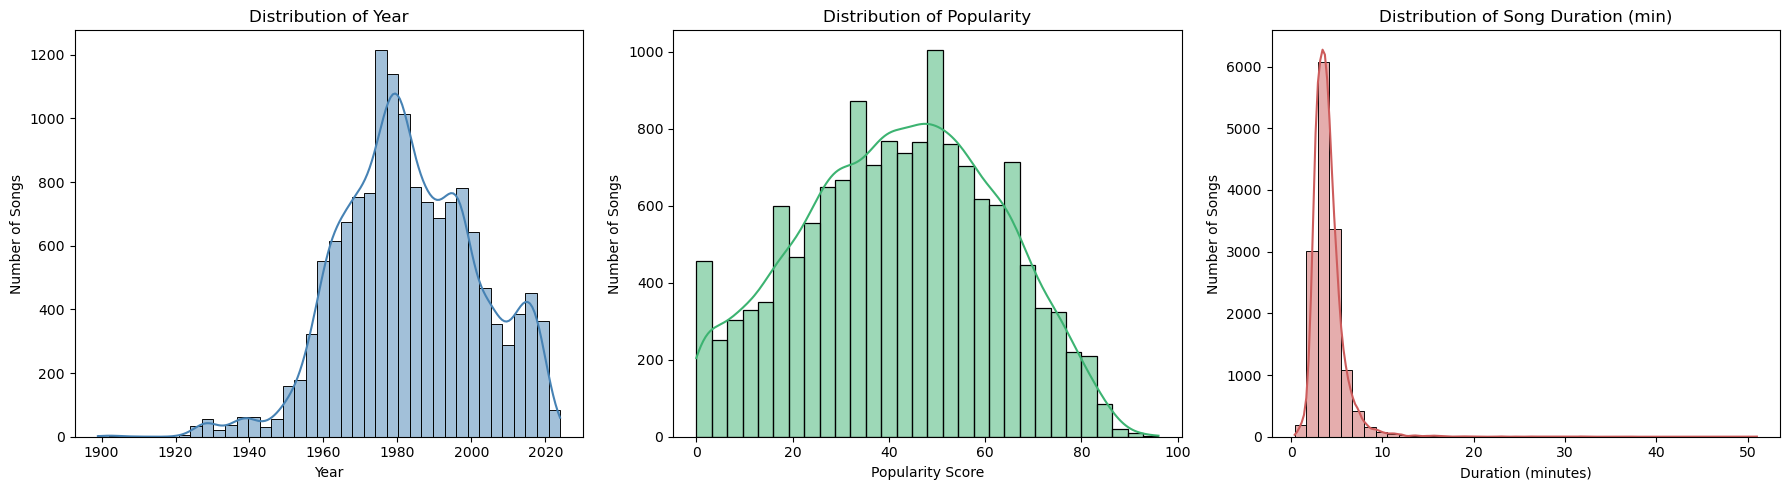

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
colors = ['steelblue', 'mediumseagreen', 'indianred']

# Year distribution
sns.histplot(data=df_classic_hits_clean, x='Year', bins=40, kde=True, color=colors[0], ax=axs[0])
axs[0].set_title('Distribution of Year')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Songs')

# Popularity distribution
sns.histplot(data=df_classic_hits_clean, x='Popularity', bins=30, kde=True, color=colors[1], ax=axs[1])
axs[1].set_title('Distribution of Popularity')
axs[1].set_xlabel('Popularity Score')
axs[1].set_ylabel('Number of Songs')

# Duration in minutes
sns.histplot(data=df_classic_hits_clean, x='Duration_min', bins=40, kde=True, color=colors[2], ax=axs[2])
axs[2].set_title('Distribution of Song Duration (min)')
axs[2].set_xlabel('Duration (minutes)')
axs[2].set_ylabel('Number of Songs')

plt.tight_layout()
plt.show()

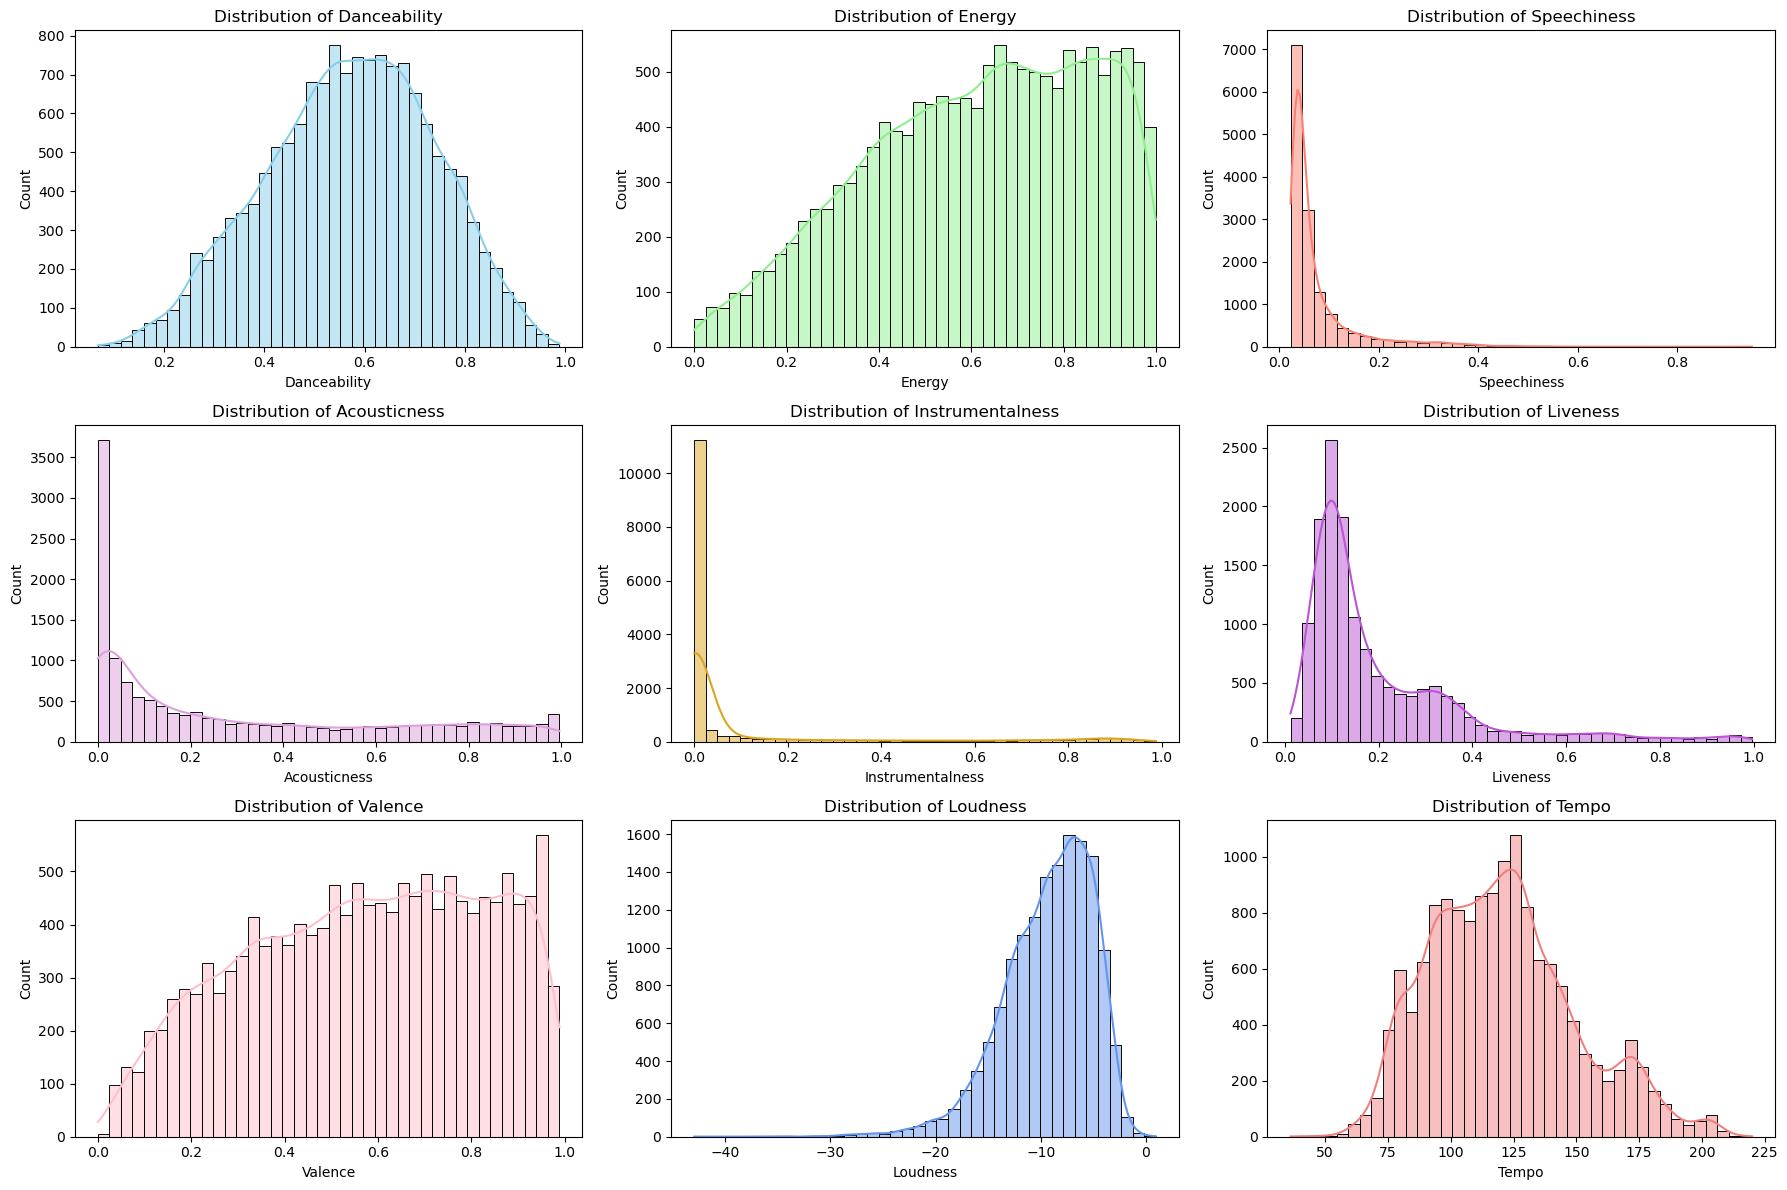

In [65]:
# Plotting 'Danceability', 'Energy', 'Speechiness','Acousticness', 'Instrumentalness', 'Liveness','Valence', 'Loudness', 'Tempo' - distribution
features = [
    'Danceability', 'Energy', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness',
    'Valence', 'Loudness', 'Tempo'
]

colors = [
    'skyblue', 'lightgreen', 'salmon',
    'plum', 'goldenrod', 'mediumorchid',
    'pink', 'cornflowerblue', 'lightcoral'
]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.histplot(data=df_classic_hits_clean, x=feature, bins=40, kde=True, ax=axs[i], color=colors[i])
    axs[i].set_title(f'Distribution of {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

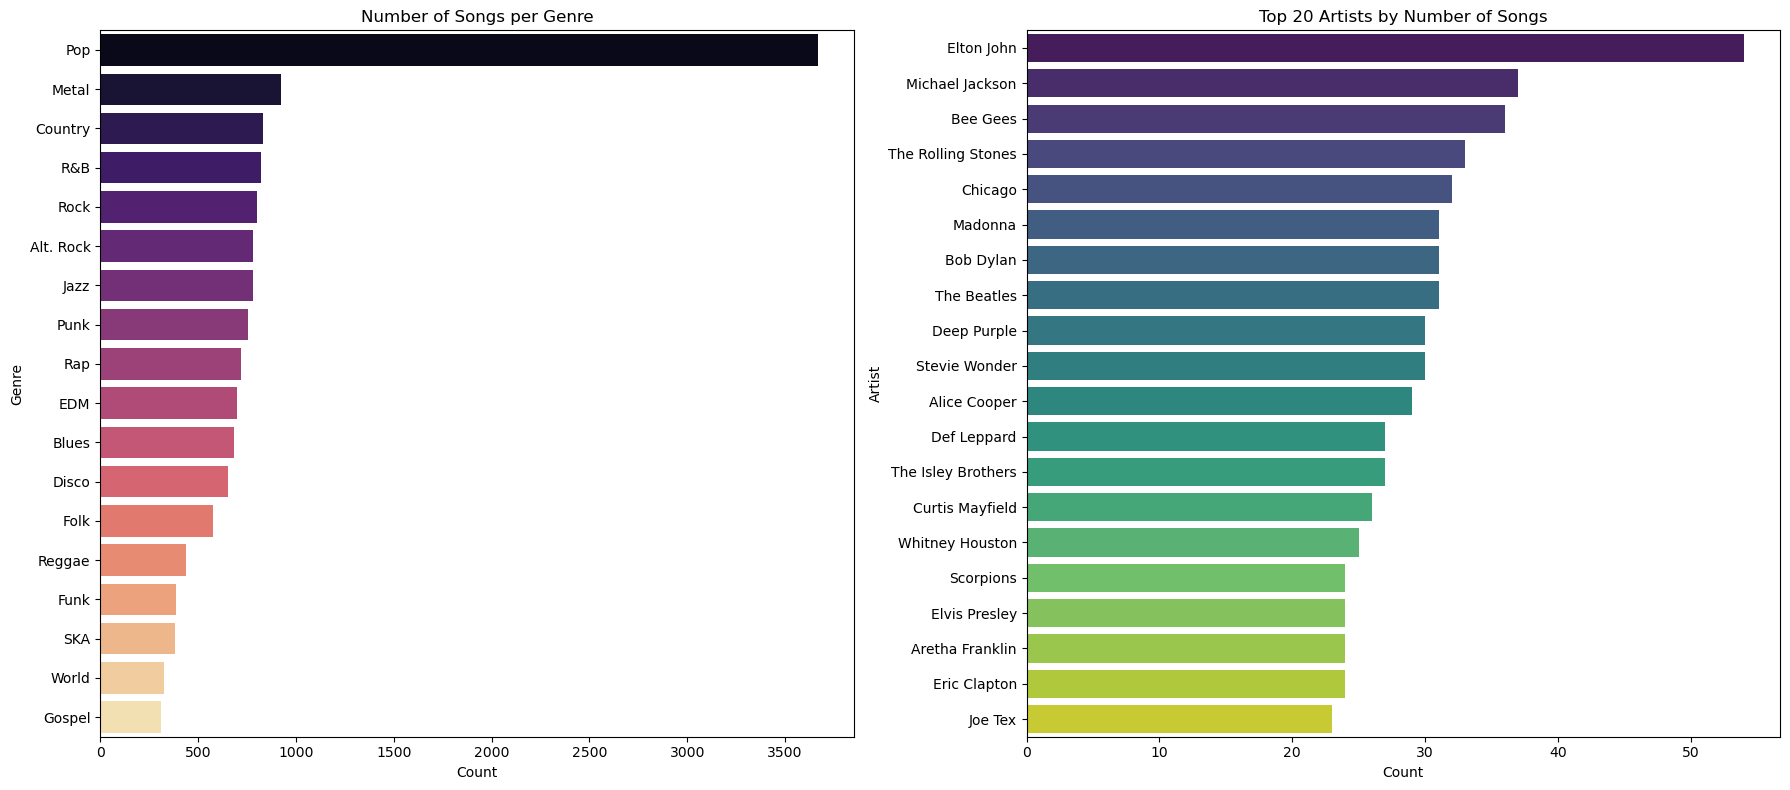

In [66]:
# Prepare genre counts
genre_counts = df_classic_hits_clean['Genre'].value_counts()

# Prepare top 20 artists
top_artists = df_classic_hits_clean['Artist'].value_counts().head(20)

# Plot both side by side
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Left: Genre Distribution
sns.barplot(x=genre_counts.values, y=genre_counts.index, hue=genre_counts.index, ax=axs[0], palette='magma')
axs[0].set_title('Number of Songs per Genre')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Genre')

# Right: Top 20 Artists
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, ax=axs[1], palette='viridis')
axs[1].set_title('Top 20 Artists by Number of Songs')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Artist')

plt.tight_layout()
plt.show()

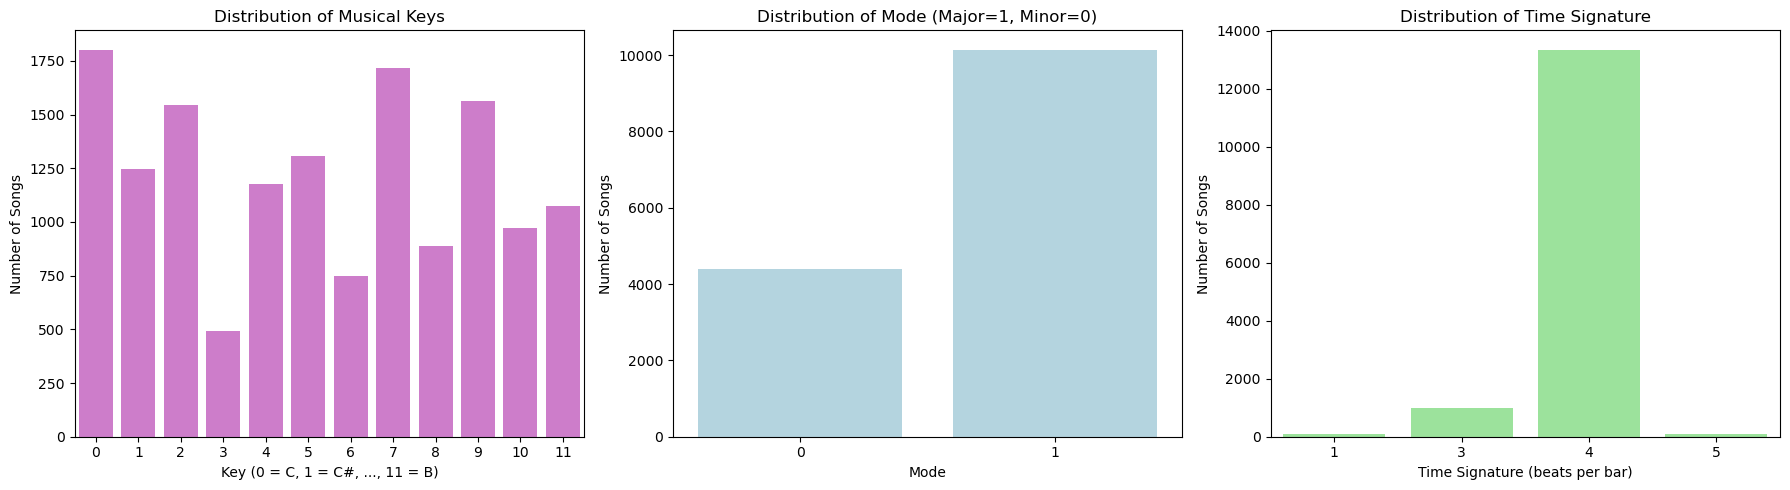

In [67]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
colors = ['orchid', 'lightblue', 'lightgreen']

# Musical Key
sns.countplot(data=df_classic_hits_clean, x='Key', ax=axs[0], color=colors[0])
axs[0].set_title('Distribution of Musical Keys')
axs[0].set_xlabel('Key (0 = C, 1 = C#, ..., 11 = B)')
axs[0].set_ylabel('Number of Songs')

# Mode (Major/Minor)
sns.countplot(data=df_classic_hits_clean, x='Mode', ax=axs[1], color=colors[1])
axs[1].set_title('Distribution of Mode (Major=1, Minor=0)')
axs[1].set_xlabel('Mode')
axs[1].set_ylabel('Number of Songs')

# Time Signature
sns.countplot(data=df_classic_hits_clean, x='Time_Signature', ax=axs[2], color=colors[2])
axs[2].set_title('Distribution of Time Signature')
axs[2].set_xlabel('Time Signature (beats per bar)')
axs[2].set_ylabel('Number of Songs')

plt.tight_layout()
plt.show()

#### Insights

- `Year`
  - The distribution is skewed a bit which may introduce temporal bias in analysis I think I will remove data before 1960 and after 2020.
    - There are very few entries before 1960 - not statistically reliable. Could introduce noise or skew early trend lines (e.g., loudness, tempo).
    - Songs after 2020 could include incomplete streaming data, or songs that haven’t aged into popularity yet, may also contain new releases with artificially low popularity score.
- `Genre`
  - Pop dominates the dataset by a large margin — over 3,500 songs.
  - The dataset is a bit imbalanced by genre - popular songs are mostly pop? 
- `Duration`
  - Most songs are between 3 to 5 minutes, peaking around 4 minutes.
	- The distribution is heavily right-skewed, with some songs stretching up to 50 minutes (live recordings, etc).
- `Popularity`
  - The distribution is slightly right-skewed, meaning fewer songs are extremely popular.
  - Not sure which model will work here: regressions vs classification if add bins. 
- `Danceability`
  - The distribution is roughly normal.
- `Energy`
  - Energy values are skewed right, with most songs scoring between 0.6 and 0.9.
  - Mostly high intense, energetic tracks (common in rock, pop, EDM).
  - Could be a strong measure for analysis with genres or popularity? 
- `Valence`
  - The scores are skewed slightly toward the higher end (0.6–0.9).
  - Most of the songs are emotionally positive (e.g., happy, cheerful, euphoric) - we know this already since these are classic hits. 
  - Could use this for mood-based analysis and might correlate with genre or popularity.
- `Loudness`
  - The distribution is left-skewed, with a long tail toward much quieter recordings (e.g., −40 dB).
  - This shows that the majority of songs are relatively loud, likely reflecting modern production standards
  - Extremely quiet tracks may be older recordings or outliers worth reviewing in preprocessing.
- `Key`
  - Key 0 (C) is the most common, followed by keys 7 (G) and 9 (A).
  - Key 3 (E♭) is the least common in the dataset.
  - The distribution is somewhat uneven but covers all 12 pitch classes.
  - No extreme imbalance, so this feature may be useful for genre/style analysis, but likely has limited impact on popularity.
- `Mode`
  - The majority of songs are in major mode (1) — over 10,000 tracks.
  - Mode might correlate with valence or genre.
- `Time Signature`
  - 4/4 time signature dominates the dataset — used in nearly all songs.
	- Small number of songs use 3/4, and very few have 5/4 or other uncommon meters.
	- Since it doesn't vary much, I'm not sure if i can use it for any analysis. 
- `Speechiness`
  - The distribution is heavily right-skewed, with very few tracks containing a high level of spoken content.
  - This indicates that the majority of songs are traditional music tracks, not podcasts or spoken-word.
  - Higher speechiness values (e.g., 0.33+) may represent rap, spoken intros, or skits — useful for genre classification.
- `Acousticness`
  - The distribution is heavily right-skewed, with the majority of songs having low acousticness (< 0.1).
  - This shows that most tracks are not acoustic — likely dominated by electronic or studio-produced music.
  - Acousticness could be useful for identifying genre trends, especially in contrast between modern vs. classic styles.
- `Instrumentalness`
  - The distribution is heavily skewed to the left, with most songs scoring close to 0.
  - This shows that most tracks contain vocals, which is typical for popular music.
  - I think it could be a useful feature for identifying instrumental genres or for filtering songs without vocals.
- `Liveness`
  - The distribution is right-skewed, meaning live performances are relatively rare in this dataset.
  - Most songs have liveness values between 0.1 and 0.3, peaking around 0.15.
- `Tempo`
  - The distribution is slightly right-skewed, but overall spread I think. 
  - The most common tempo (~120 BPM) aligns with the typical pace of pop and dance music.
  - Outliers on the higher end (180+ BPM) are EDM or metal tracks.

In [68]:
# removing songs based on year as mentioned above
df_classic_hits_clean = df_classic_hits_clean[(df_classic_hits_clean['Year'] >= 1960) & (df_classic_hits_clean['Year'] <= 2020)].copy()
df_classic_hits_clean

Track          Artist  Year  Time_Signature  \
0                    Hey Jack Kerouac  10,000 Maniacs  1987               4   
1                    Like the Weather  10,000 Maniacs  1987               4   
2             What's the Matter Here?  10,000 Maniacs  1987               4   
3                          Trouble Me  10,000 Maniacs  1989               4   
4               Candy Everybody Wants  10,000 Maniacs  1992               4   
...                               ...             ...   ...             ...   
15145  7 Seconds (feat. Neneh Cherry)  Youssou N'Dour  1994               4   
15146                          Birima  Youssou N'Dour  1995               4   
15147                             Set  Youssou N'Dour  2004               4   
15148                Africa Remembers  Youssou N'Dour  2007               4   
15149                       Wiri-Wiri  Youssou N'Dour  2007               4   

       Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0             0.616   0.511    6   -15.894     1       0.0279       0.03840   
1             0.770   0.459    1   -17.453     1       0.0416       0.11200   
2             0.593   0.816    9    -7.293     1       0.0410       0.00449   
3             0.861   0.385    2   -10.057     1       0.0341       0.15400   
4             0.622   0.876   10    -6.310     1       0.0305       0.01930   
...             ...     ...  ...       ...   ...          ...           ...   
15145         0.679   0.659    1   -10.826     0       0.0269       0.07710   
15146         0.692   0.737   10    -7.042     1       0.0512       0.25400   
15147         0.733   0.730    0   -11.056     1       0.0479       0.04240   
15148         0.696   0.378    5   -16.181     0       0.0797       0.44400   
15149         0.654   0.516    5   -10.325     1       0.0707       0.30400   

       Instrumentalness  Liveness  Valence    Tempo  Popularity      Genre  \
0              0.000000    0.1500    0.604  132.015          40  Alt. Rock   
1              0.003430    0.1450    0.963  133.351          43  Alt. Rock   
2              0.000032    0.0896    0.519   99.978          12  Alt. Rock   
3              0.000000    0.1230    0.494  117.913          47  Alt. Rock   
4              0.006840    0.0987    0.867  104.970          43  Alt. Rock   
...                 ...       ...      ...      ...         ...        ...   
15145          0.000004    0.3160    0.528  154.171          47      World   
15146          0.017400    0.1120    0.808  105.754          18      World   
15147          0.000101    0.0282    0.840  146.213          25      World   
15148          0.019400    0.0850    0.551   97.677           8      World   
15149          0.000235    0.1100    0.259   83.013           5      World   

       Duration_min  
0          3.440217  
1          3.944217  
2          4.852883  
3          3.226000  
4          3.099333  
...             ...  
15145      5.103767  
15146      3.806217  
15147      3.780433  
15148      9.341100  
15149      4.124433  

[13294 rows x 18 columns]

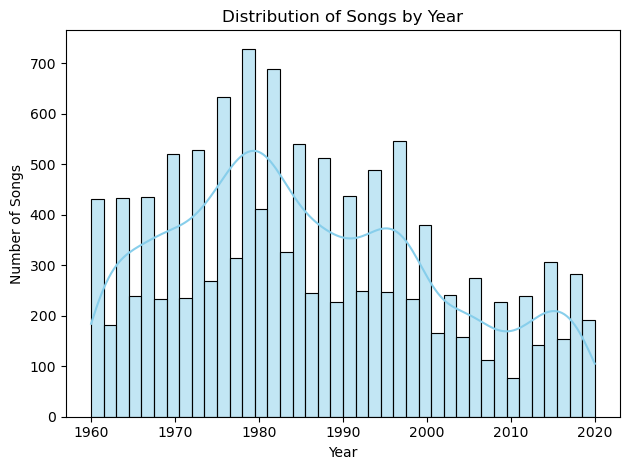

In [69]:
# Plotting Year distribution with the new dataset
sns.histplot(data=df_classic_hits_clean, x='Year', bins=40, kde=True, color='skyblue')
plt.title('Distribution of Songs by Year')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.tight_layout()
plt.show()

# looks better now

### Bivariate Analysis

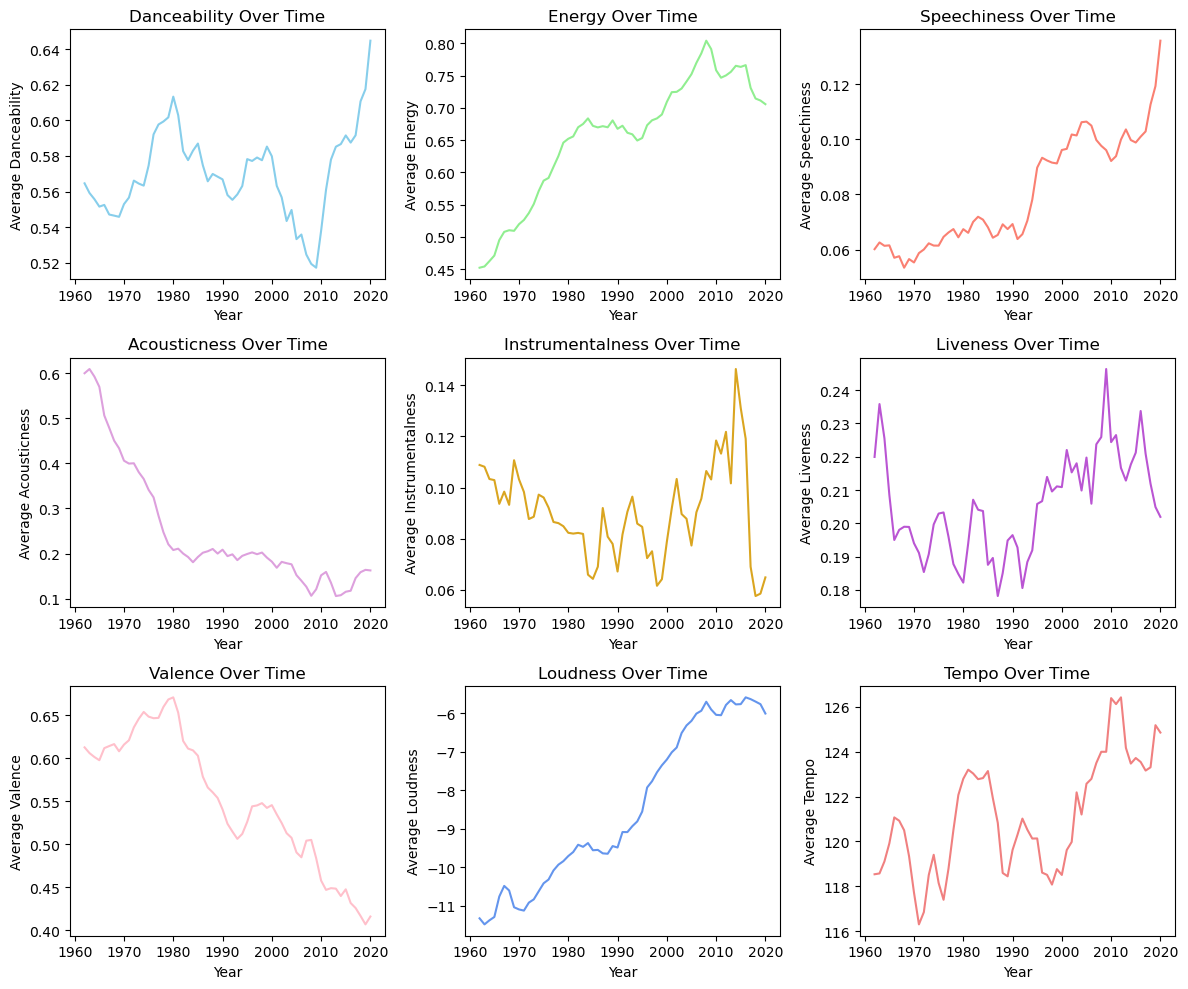

In [70]:
# checking features over time
features = [
    'Danceability', 'Energy', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness',
    'Valence', 'Loudness', 'Tempo'
]

colors = [
    'skyblue', 'lightgreen', 'salmon',
    'plum', 'goldenrod', 'mediumorchid',
    'pink', 'cornflowerblue', 'lightcoral'
]

# using moving avg to smooth out noisy line plots
# features_over_time = df_classic_hits_clean.groupby('Year')[features].mean().reset_index()
features_over_time = df_classic_hits_clean.groupby('Year')[features].mean().rolling(window=3).mean().reset_index()

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.lineplot(data=features_over_time, x='Year', y=feature, ax=axs[i], color=colors[i])
    axs[i].set_title(f'{feature} Over Time')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Average ' + feature)

plt.tight_layout()
plt.show()

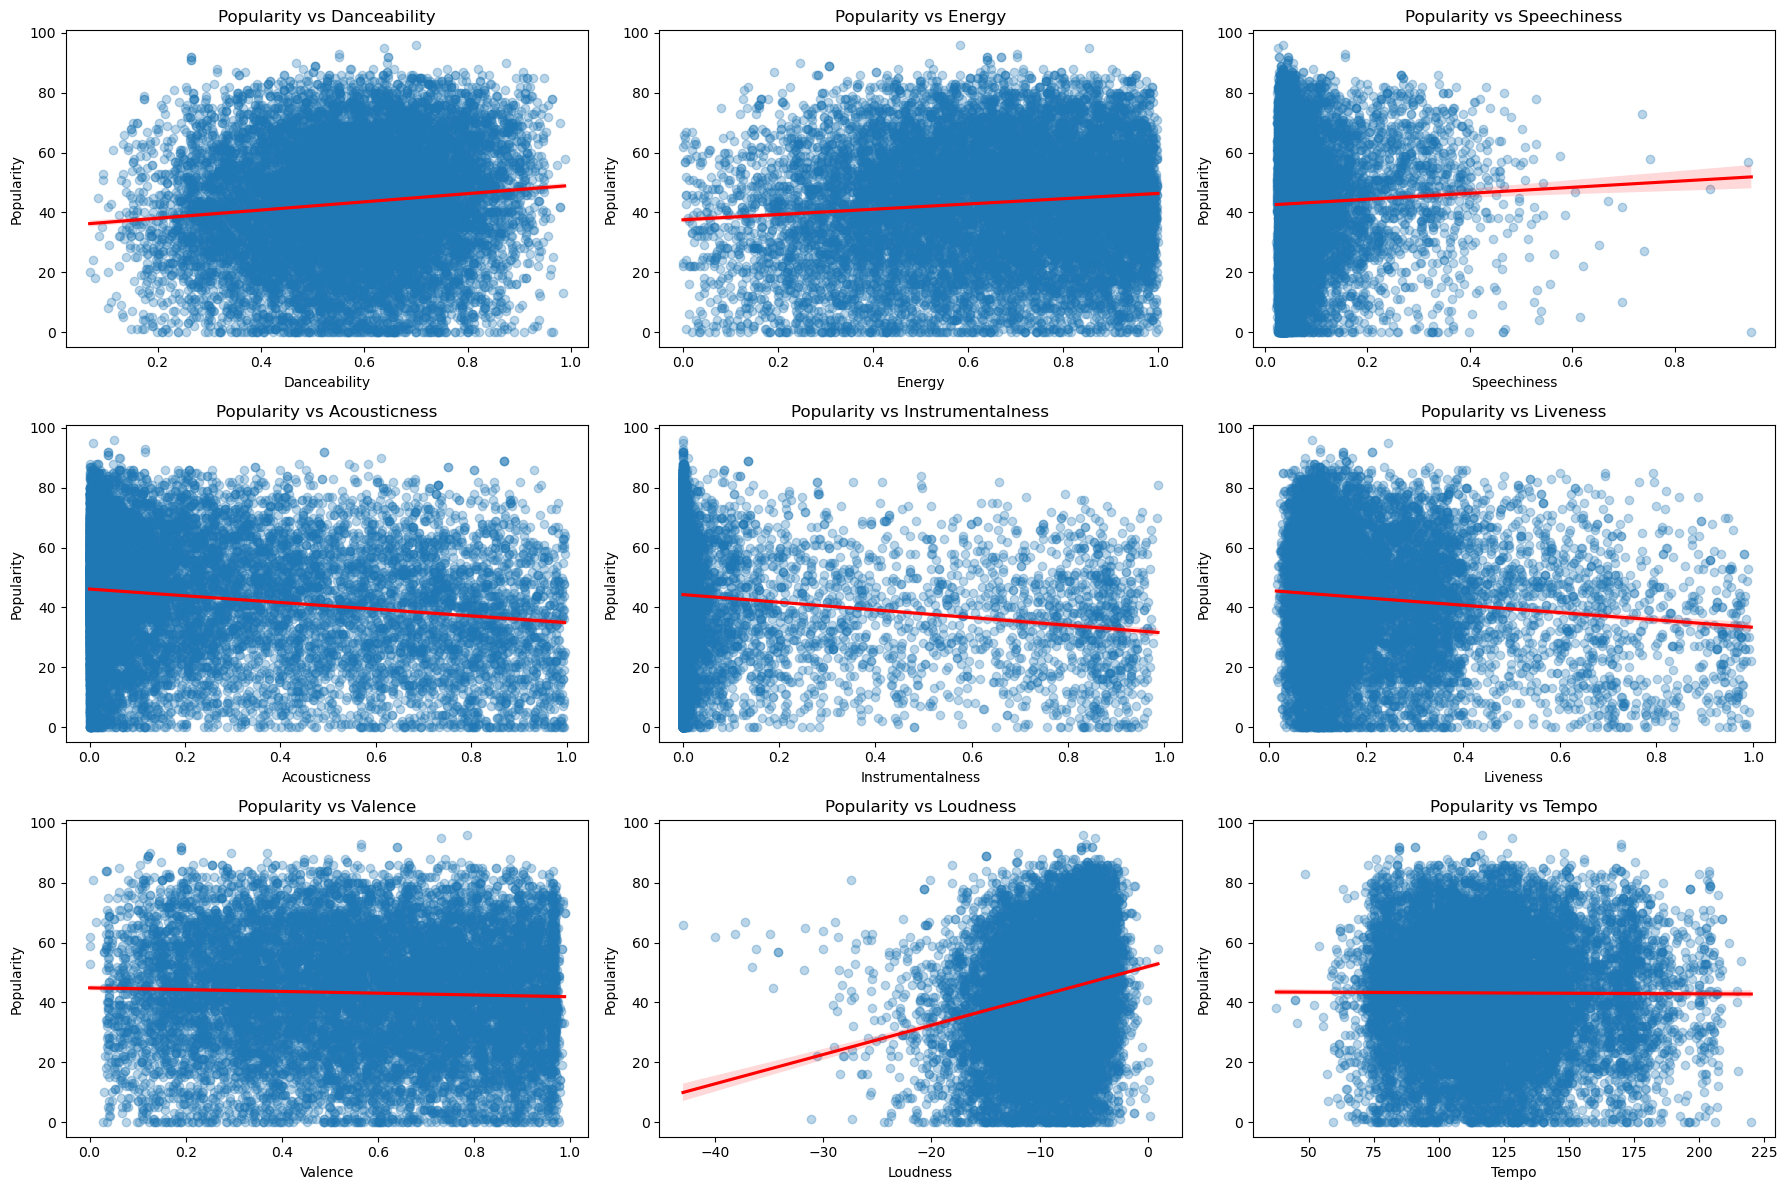

In [71]:
# popularity vs. each audio feature
# which features are even slightly predictive of popularity?
features = [
    'Danceability', 'Energy', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness',
    'Valence', 'Loudness', 'Tempo'
]

import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axs = axs.flatten()

for i, feature in enumerate(features):
    sns.regplot(
        data=df_classic_hits_clean,
        x=feature, y='Popularity',
        ax=axs[i],
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
    axs[i].set_title(f'Popularity vs {feature}')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Popularity')

plt.tight_layout()
plt.show()

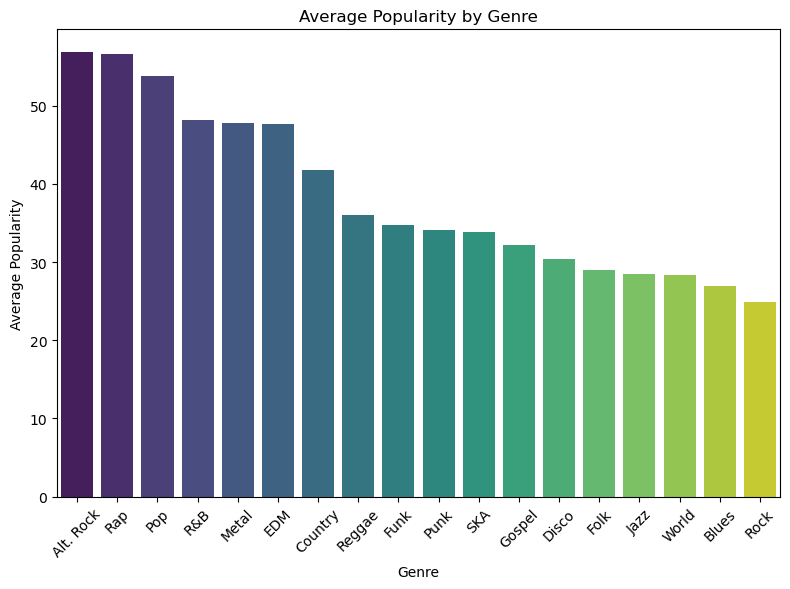

In [ ]:
# Calculate average popularity by genre
genre_popularity = df_classic_hits_clean.groupby('Genre')['Popularity'].mean().sort_values(ascending=False).reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=genre_popularity, x='Genre', y='Popularity', hue='Genre', palette='viridis', legend=False)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights

-  `Trends Over Time`:
   - Danceability, energy, and speechiness have risen over the decades — music is becoming more upbeat and vocal-heavy.
   - Acousticness has dropped — modern songs favor electronic over acoustic.
   - Loudness has slowly increased, while valence (musical positivity) has declined — songs are louder, but less "happy." This is so sad.
   - Tempo, instrumentalness, and liveness show minimal change.
- `Popularity Correlations`: 
  - Songs that are energetic, loud, and danceable tend to be slightly more popular.
  - Tracks that are acoustic, instrumental, or live skew less popular.
  - Tempo and valence show little impact on popularity.
- `Genre-Based Popularity`: 
  - Alt. Rock, Rap, and Pop score highest on average popularity.
  - Jazz, Blues, and Folk trend lower — possibly due to older catalogues or niche appeal.


### Multivariate Analysis

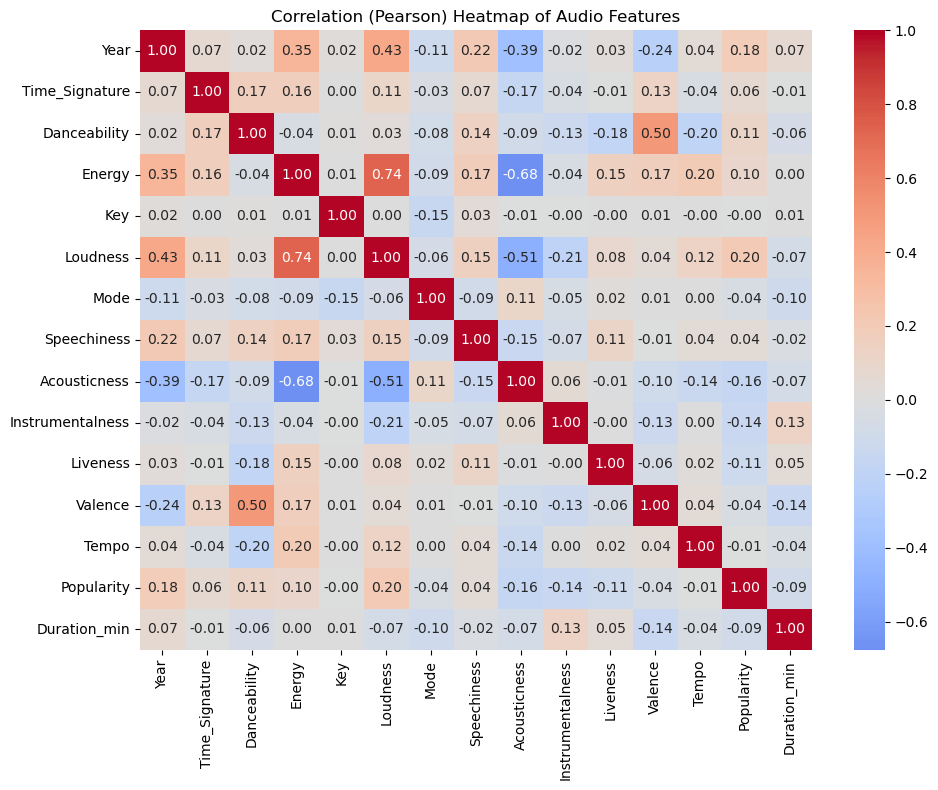

In [73]:
# Pearson correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_classic_hits_clean.corr(numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation (Pearson) Heatmap of Audio Features')
plt.tight_layout()
plt.show()

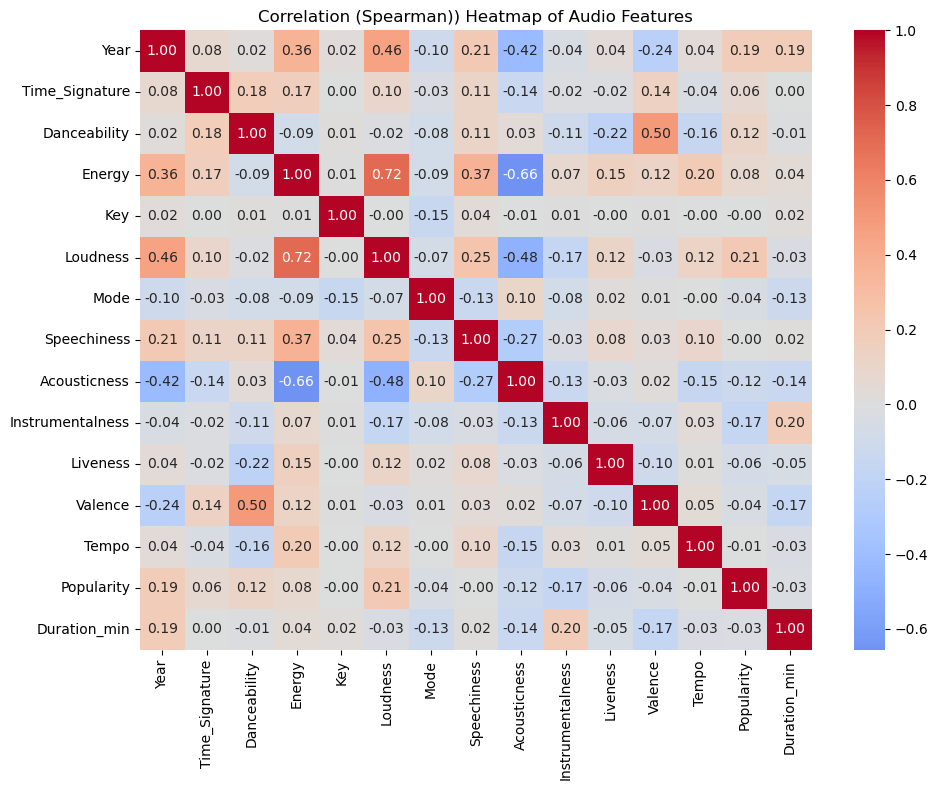

In [74]:
# Spearman correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df_classic_hits_clean.corr(method='spearman',numeric_only=True)

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation (Spearman)) Heatmap of Audio Features')
plt.tight_layout()
plt.show()

#### Key Insights
- `Strong Relationships`
  - Energy <> Loudness: Very strong - 0.75: Louder songs tend to feel more energetic — confirms what we’d expect.
  - Popularity <> Loudness: 0.25: Popular songs tend to be louder.
  - Danceability <> Valence: 0.48: Happier songs are generally more danceable.
  - Popularity <> Danceability / Energy: Mild correlations (~0.13–0.15)

- `Strong Negative Correlations`
  - Energy <> Acousticness: -0.71: Acoustic songs are less energetic..
  - Danceability <> Acousticness: -0.70: Dance tracks tend to be less acoustic.
  - Loudness <> Acousticness: -0.53: Acoustic tracks are usually quieter.
  - Year <> Acousticness: -0.50: Acousticness has declined in modern music. — production shift toward digital/electronic.

- `Weak or No Correlation with Popularity`
  - Valence, Tempo, Mode, Instrumentalness, Speechiness have very low correlation with popularity.
  - Suggests that mood, pace, and lyrics don’t individually drive popularity — may work better as a combined signal.


## Conclusion 
So far, the exploratory analysis has revealed clear patterns across features and time. These findings will guide the next phase, which includes building a popularity prediction model and experimenting with a simple, unsupervised content-based recommendation system.

## Plan for Final Project 

`Here's what I've done so far:`  
- Data Cleaning & Preprocessing:
  -	Loaded the dataset and explored structure and types
  - Handled missing values, duplicates, and formatting errors
  - Created new columns (e.g., Duration_min)
  - Removed irrelevant or inconsistent data (e.g., extreme durations, invalid tempo)
  - Filtered out noisy year values (pre-1940, post-2020)
- Exploratory Data Analysis (EDA):
  - Ran univariate analysis on all key audio features
  - Explored bivariate relationships with popularity + trends over time
  - Generated a correlation heatmap (Pearson + Spearman) for multivariate patterns
  
`Next steps:`  
- Predictive modeling:
  -  *Can we predict song popularity based on audio features?*  
     - Target: Popularity (as continuous for regression, or binned for classification)
     - Features: Scaled audio features such as Danceability, Energy, Valence, etc.
  - Models I'm planning to use:
    - Linear Regression (baseline)
    - Random Forest Regressor (non-linear)
    - XGBoost or Ridge/Lasso (optional for tuning)
- Content-Based Song Recommender (Optional)
  - Challenge: No user interaction data to support traditional recommender system training
  - Backup Plan:
    - Try clustering (e.g., K-Means) to group similar songs based on audio features
    - Use PCA/t-SNE to visualize musical space
    - Recommend songs based on cosine similarity in feature space
    - Evaluate using manual validation or peer feedback


## Additional Visualizations for Popularity Analysis


To address feedback regarding data density and clearer distribution comparisons, we add:
- Hexbin plots to highlight concentration regions
- Box plots using popularity quantile bins

### 4.1 Hexbin: Popularity vs Danceability

In [75]:
df_classic_hits_clean.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Track', 'Artist', 'Year', 'Time_Signature', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity',
       'Genre', 'Duration_min'],
      dtype='object')>

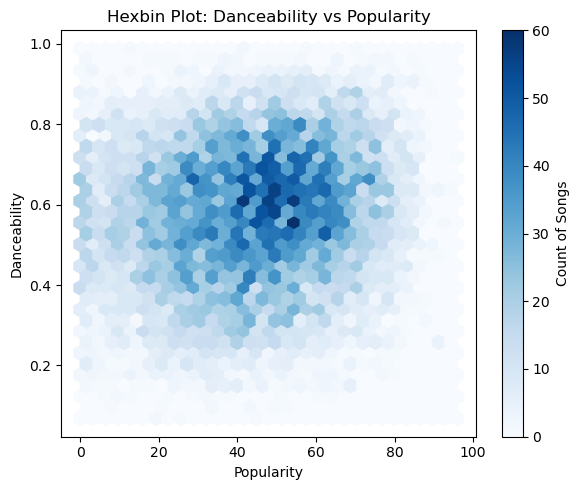

In [81]:
plt.figure(figsize=(6, 5))
plt.hexbin(
    x=df_classic_hits_clean['Popularity'],
    y=df_classic_hits_clean['Danceability'],
    gridsize=30,
    cmap='Blues'
)
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.title('Hexbin Plot: Danceability vs Popularity')
plt.colorbar(label='Count of Songs')
plt.tight_layout()
plt.show()

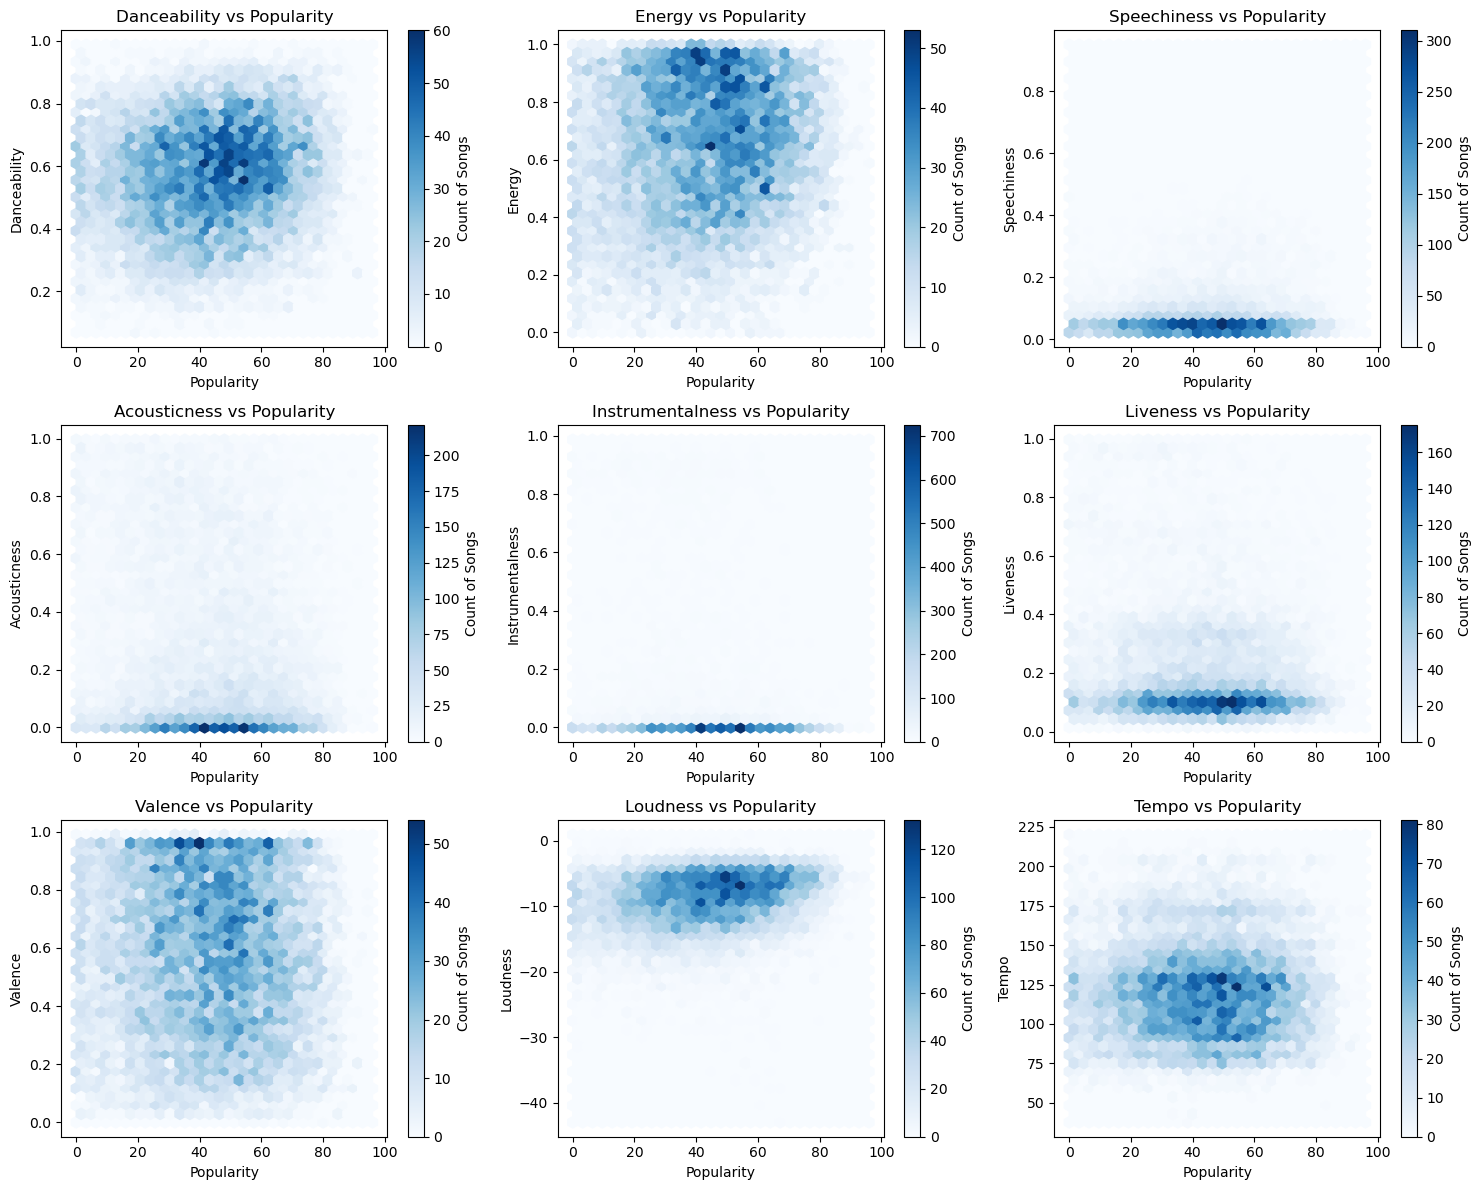

In [82]:
import matplotlib.pyplot as plt

# List of features to compare with Popularity
features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness', 
    'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo'
]

# Plot settings
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axs = axs.flatten()

for i, feature in enumerate(features):
    hb = axs[i].hexbin(
        x=df_classic_hits_clean['Popularity'],
        y=df_classic_hits_clean[feature],
        gridsize=30,
        cmap='Blues'
    )
    axs[i].set_title(f'{feature} vs Popularity')
    axs[i].set_xlabel('Popularity')
    axs[i].set_ylabel(feature)
    cb = fig.colorbar(hb, ax=axs[i])
    cb.set_label('Count of Songs')

plt.tight_layout()
plt.show()

/var/folders/sy/t6c0gygs16q5l_178cfcc9000000gn/T/ipykernel_26989/1916508415.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Popularity_bin', y=feature, data=df_classic_hits_clean, palette='pastel')
/var/folders/sy/t6c0gygs16q5l_178cfcc9000000gn/T/ipykernel_26989/1916508415.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Popularity_bin', y=feature, data=df_classic_hits_clean, palette='pastel')
/var/folders/sy/t6c0gygs16q5l_178cfcc9000000gn/T/ipykernel_26989/1916508415.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pop

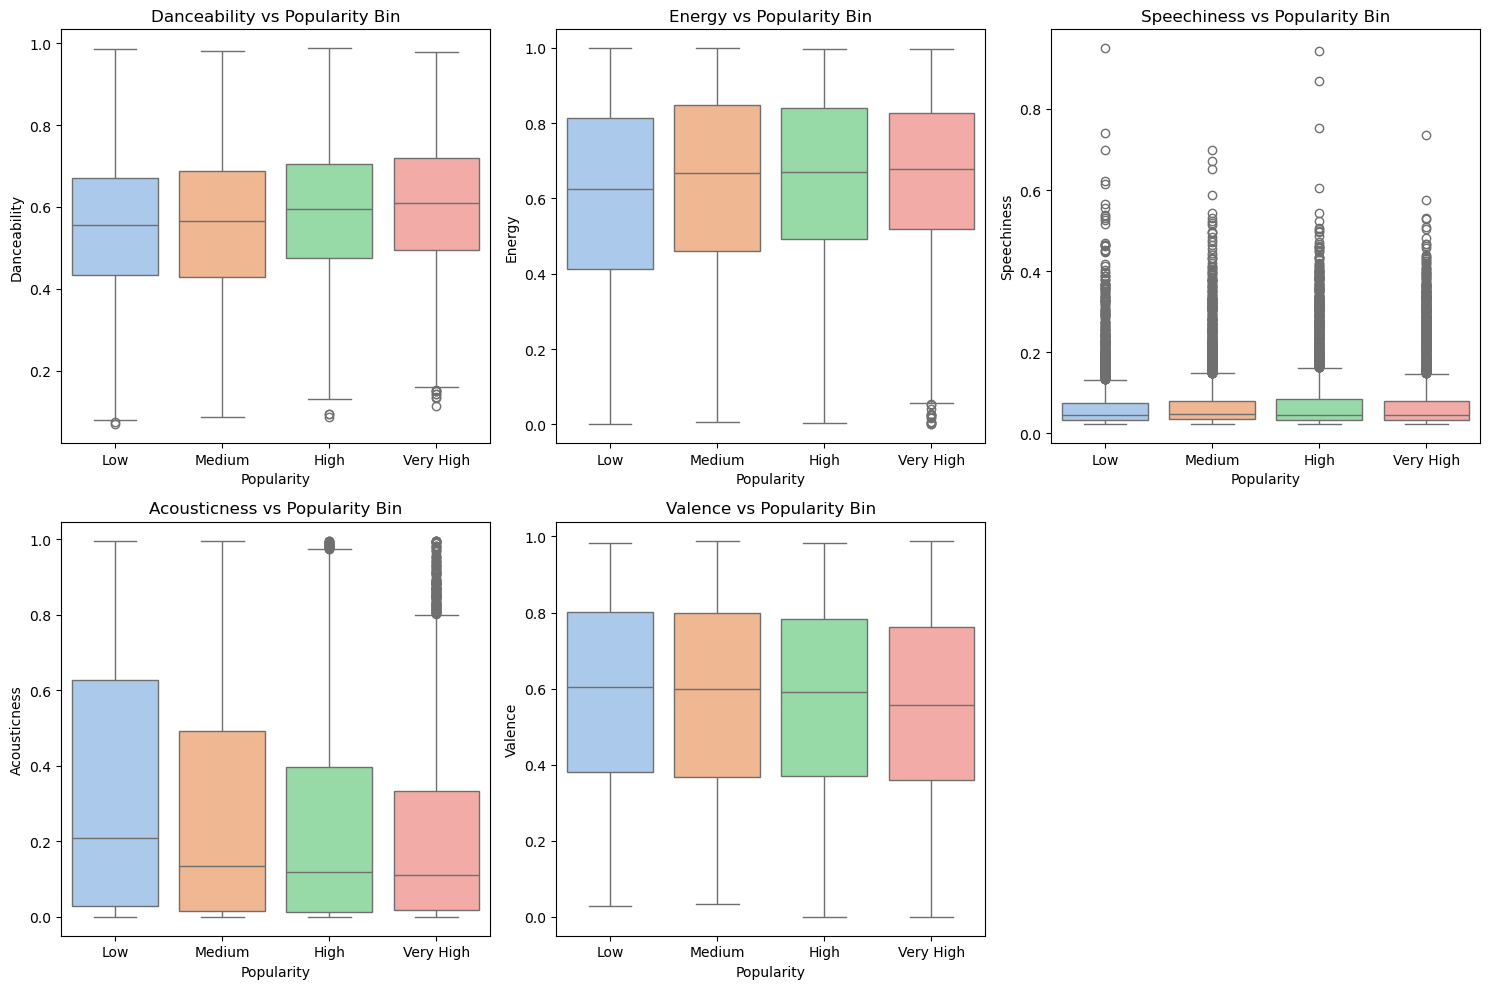

In [83]:
# Bin popularity into quantiles
df_classic_hits_clean['Popularity_bin'] = pd.qcut(df_classic_hits_clean['Popularity'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Valence']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Popularity_bin', y=feature, data=df_classic_hits_clean, palette='pastel')
    plt.title(f'{feature} vs Popularity Bin')
    plt.xlabel('Popularity')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [84]:
from scipy.stats import spearmanr

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo']

for feature in features:
    rho, p = spearmanr(df_classic_hits_clean[feature], df_classic_hits_clean['Popularity'])
    print(f"{feature}: Spearman rho = {rho:.3f}, p-value = {p:.3e}")

Danceability: Spearman rho = 0.116, p-value = 5.598e-41
Energy: Spearman rho = 0.080, p-value = 3.682e-20
Speechiness: Spearman rho = -0.001, p-value = 9.398e-01
Acousticness: Spearman rho = -0.118, p-value = 1.409e-42
Instrumentalness: Spearman rho = -0.169, p-value = 4.708e-86
Liveness: Spearman rho = -0.064, p-value = 1.631e-13
Valence: Spearman rho = -0.041, p-value = 2.685e-06
Loudness: Spearman rho = 0.210, p-value = 6.335e-133
Tempo: Spearman rho = -0.006, p-value = 4.543e-01


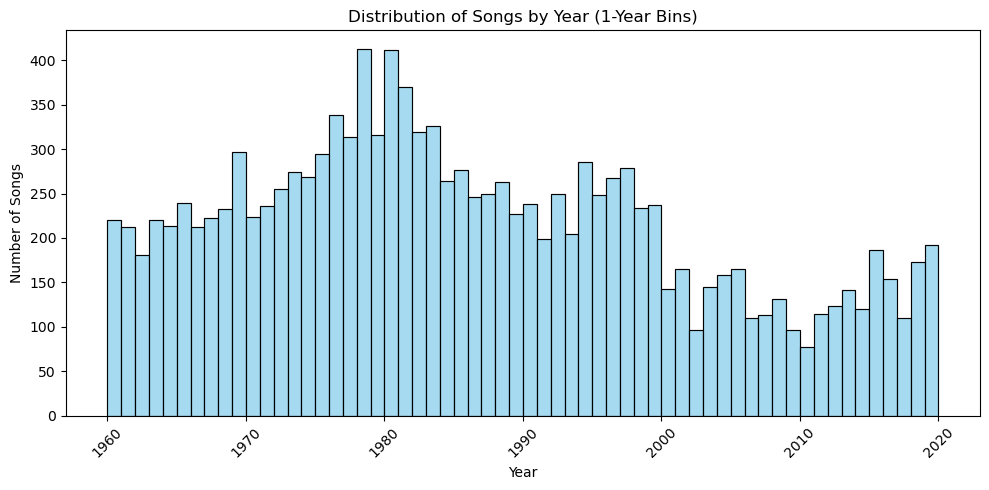

In [85]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_classic_hits_clean, x='Year', bins=range(df_classic_hits_clean['Year'].min(), df_classic_hits_clean['Year'].max() + 1), kde=False, color='skyblue')
plt.title('Distribution of Songs by Year (1-Year Bins)')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
df_classic_hits_clean['Decade'] = (df_classic_hits_clean['Year'] // 10) * 10

In [87]:
df_classic_hits_clean.head()

Track          Artist  Year  Time_Signature  \
0         Hey Jack Kerouac  10,000 Maniacs  1987               4   
1         Like the Weather  10,000 Maniacs  1987               4   
2  What's the Matter Here?  10,000 Maniacs  1987               4   
3               Trouble Me  10,000 Maniacs  1989               4   
4    Candy Everybody Wants  10,000 Maniacs  1992               4   

   Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0         0.616   0.511    6   -15.894     1       0.0279       0.03840   
1         0.770   0.459    1   -17.453     1       0.0416       0.11200   
2         0.593   0.816    9    -7.293     1       0.0410       0.00449   
3         0.861   0.385    2   -10.057     1       0.0341       0.15400   
4         0.622   0.876   10    -6.310     1       0.0305       0.01930   

   Instrumentalness  Liveness  Valence    Tempo  Popularity      Genre  \
0          0.000000    0.1500    0.604  132.015          40  Alt. Rock   
1          0.003430    0.1450    0.963  133.351          43  Alt. Rock   
2          0.000032    0.0896    0.519   99.978          12  Alt. Rock   
3          0.000000    0.1230    0.494  117.913          47  Alt. Rock   
4          0.006840    0.0987    0.867  104.970          43  Alt. Rock   

   Duration_min Popularity_bin  Decade  
0      3.440217         Medium    1980  
1      3.944217         Medium    1980  
2      4.852883            Low    1980  
3      3.226000           High    1980  
4      3.099333         Medium    1990

In [90]:
from scipy.stats import spearmanr

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo']

decades = df_classic_hits_clean['Decade'].unique()

for decade in sorted(decades):
    print(f"\nDecade: {decade}")
    subset = df_classic_hits_clean[df_classic_hits_clean['Decade'] == decade]
    for feature in features:
        rho, p = spearmanr(subset[feature], subset['Popularity'])
        print(f"{feature}: rho = {rho:.3f}, p = {p:.2e}")


Decade: 1960
Danceability: rho = 0.084, p = 7.07e-05
Energy: rho = 0.205, p = 1.02e-22
Speechiness: rho = -0.069, p = 1.12e-03
Acousticness: rho = -0.274, p = 6.32e-40
Instrumentalness: rho = -0.193, p = 2.22e-20
Liveness: rho = -0.059, p = 4.78e-03
Valence: rho = 0.032, p = 1.34e-01
Loudness: rho = 0.253, p = 4.47e-34
Tempo: rho = 0.077, p = 2.56e-04

Decade: 1970
Danceability: rho = 0.065, p = 4.62e-04
Energy: rho = -0.035, p = 5.53e-02
Speechiness: rho = -0.090, p = 1.06e-06
Acousticness: rho = 0.021, p = 2.59e-01
Instrumentalness: rho = -0.155, p = 3.60e-17
Liveness: rho = -0.056, p = 2.31e-03
Valence: rho = -0.007, p = 7.10e-01
Loudness: rho = 0.066, p = 3.68e-04
Tempo: rho = -0.022, p = 2.28e-01

Decade: 1980
Danceability: rho = 0.130, p = 1.46e-12
Energy: rho = -0.021, p = 2.61e-01
Speechiness: rho = -0.141, p = 1.16e-14
Acousticness: rho = 0.061, p = 8.91e-04
Instrumentalness: rho = -0.166, p = 1.08e-19
Liveness: rho = -0.086, p = 2.62e-06
Valence: rho = 0.031, p = 9.29e-02
Lo

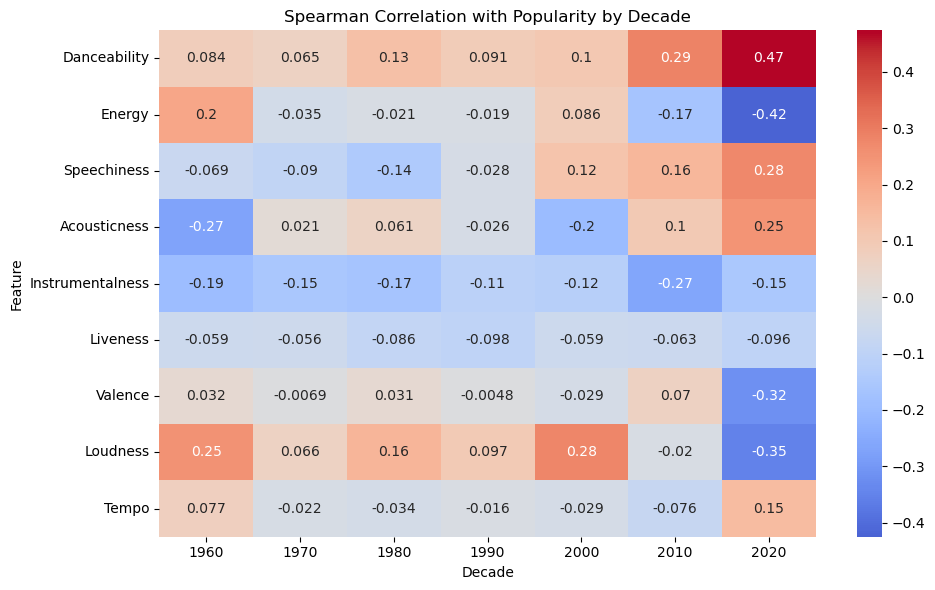

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Create a Decade column
df_classic_hits_clean['Decade'] = (df_classic_hits_clean['Year'] // 10) * 10

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo']

# Dictionary to store correlations
correlation_dict = {}

# Loop through each decade
for decade in sorted(df_classic_hits_clean['Decade'].unique()):
    subset = df_classic_hits_clean[df_classic_hits_clean['Decade'] == decade]
    corr_values = []
    for feature in features:
        rho, _ = spearmanr(subset[feature], subset['Popularity'])
        corr_values.append(rho)
    correlation_dict[decade] = corr_values

# Create DataFrame from results
corr_df = pd.DataFrame(correlation_dict, index=features)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation with Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Predictive Modeling of Popularity


In [92]:
df_classic_hits_clean.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['Track', 'Artist', 'Year', 'Time_Signature', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Popularity',
       'Genre', 'Duration_min', 'Popularity_bin', 'Decade'],
      dtype='object')>

In [93]:
features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Loudness',
    'Tempo', 'Duration_min'
]
target = 'Popularity'

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features and target
features = [
    'Danceability', 'Energy', 'Speechiness', 'Acousticness',
    'Instrumentalness', 'Liveness', 'Valence', 'Loudness',
    'Tempo', 'Duration_min'
]

X = df_classic_hits_clean[features]
y = df_classic_hits_clean['Popularity']

# Drop missing values (just in case)
X = X.dropna()
y = y.loc[X.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predict
y_pred = linreg.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Linear Regression Performance:")
print(f"R² Score       : {r2:.3f}")
print(f"MAE            : {mae:.2f}")
print(f"RMSE           : {rmse:.2f}")

Linear Regression Performance:
R² Score       : 0.096
MAE            : 15.39
RMSE           : 18.91


In [96]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluation
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest Regressor Performance:")
print(f"R² Score       : {r2_rf:.3f}")
print(f"MAE            : {mae_rf:.2f}")
print(f"RMSE           : {rmse_rf:.2f}")

Random Forest Regressor Performance:
R² Score       : 0.202
MAE            : 14.25
RMSE           : 17.77


/var/folders/sy/t6c0gygs16q5l_178cfcc9000000gn/T/ipykernel_26989/517320883.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='crest')


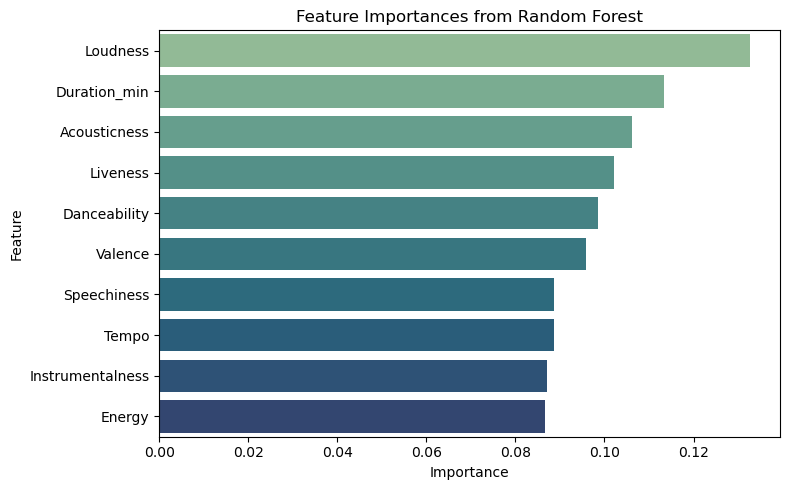

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_
feature_names = features  # same list used in X
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='crest')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features and target
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 
            'Tempo', 'Duration_min']
X = df_classic_hits_clean[features]
y = df_classic_hits_clean['Popularity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit to training data
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and performance
print("Best Params:", grid_search_rf.best_params_)
print("Best R² on CV:", grid_search_rf.best_score_)

# Evaluate on test set
best_rf = grid_search_rf.best_estimator_
y_pred_gs = best_rf.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Grid-Search Tuned Random Forest Performance:")
print("R² Score       :", r2_score(y_test, y_pred_gs))
print("MAE            :", mean_absolute_error(y_test, y_pred_gs))
print("RMSE           :", np.sqrt(mean_squared_error(y_test, y_pred_gs)))

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R² on CV: 0.19730226951911942
Grid-Search Tuned Random Forest Performance:
R² Score       : 0.20757621001052062
MAE            : 14.168579254642811
RMSE           : 17.71099811745745


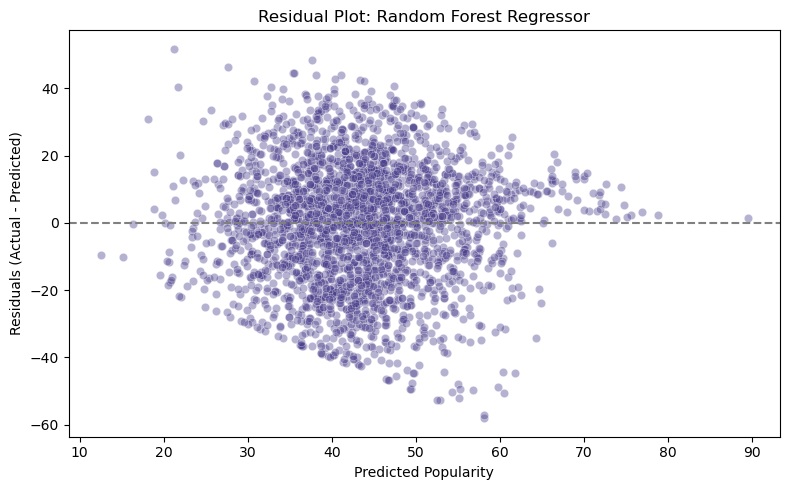

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_gs

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_gs, y=residuals, alpha=0.4, color='darkslateblue')
plt.axhline(0, linestyle='--', color='gray')
plt.xlabel('Predicted Popularity')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot: Random Forest Regressor')
plt.tight_layout()
plt.show()

The model tends to perform best on mid-range popularity scores, but struggles to capture the extremes. This suggests that while some patterns in audio features are predictive, additional metadata (e.g., artist fame, promotional exposure) may be necessary to explain highly popular outliers.

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# Features and target
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 
            'Loudness', 'Tempo', 'Duration_min']
target = 'Popularity'

# Store results
results_by_decade = []

# Loop through each unique decade
for decade in sorted(df_classic_hits_clean['Decade'].unique()):
    df_decade = df_classic_hits_clean[df_classic_hits_clean['Decade'] == decade]
    
    if len(df_decade) < 100:
        continue  # Skip decades with too few samples
    
    X = df_decade[features]
    y = df_decade[target]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train Random Forest
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Append results
    results_by_decade.append({
        'Decade': decade,
        'R²': round(r2, 3),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'Samples': len(df_decade)
    })

# Display
results_df = pd.DataFrame(results_by_decade)
print(results_df)

   Decade     R²    MAE   RMSE  Samples
0    1960  0.222  14.55  17.78     2250
1    1970  0.125  15.03  18.97     2934
2    1980  0.136  14.54  18.01     2952
3    1990  0.105  15.17  18.93     2441
4    2000  0.135  13.75  17.84     1323
5    2010  0.159  13.87  17.22     1335


In [114]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Feature set (update this if your variable names are different)
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness', 
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 
            'Tempo', 'Duration_min']
X = df_classic_hits_clean[features]
y = df_classic_hits_clean['Popularity']

# Split and scale
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models and their grids
models = {
    'Decision Tree': (
        DecisionTreeRegressor(random_state=42),
        {
            'model__max_depth': [None, 5, 10, 20],
            'model__min_samples_split': [2, 5],
            'model__min_samples_leaf': [1, 2],
        }
    ),
    'XGBoost': (
        XGBRegressor(objective='reg:squarederror', random_state=42),
        {
            'model__n_estimators': [100, 200],
            'model__max_depth': [3, 6],
            'model__learning_rate': [0.05, 0.1],
        }
    ),
    'Ridge': (
        Ridge(),
        {
            'model__alpha': [0.1, 1.0, 10.0],
        }
    ),
    'Lasso': (
        Lasso(max_iter=5000),
        {
            'model__alpha': [0.001, 0.01, 0.1, 1.0],
        }
    )
}

# Results storage
results = []

for name, (model, param_grid) in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    
    grid = GridSearchCV(pipe, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    results.append({
        'Model': name,
        'Best Params': grid.best_params_,
        'R²': round(r2_score(y_test, y_pred), 3),
        'MAE': round(mean_absolute_error(y_test, y_pred), 2),
        'RMSE': round(np.sqrt(mean_squared_error(y_test, y_pred)), 2)
    })

# Display results
results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits
           Model                                        Best Params     R²  \
1        XGBoost  {'model__learning_rate': 0.05, 'model__max_dep...  0.148   
3          Lasso                             {'model__alpha': 0.01}  0.097   
2          Ridge                             {'model__alpha': 10.0}  0.096   
0  Decision Tree  {'model__max_depth': 5, 'model__min_samples_le...  0.073   

     MAE   RMSE  
1  14.95  18.37  
3  15.40  18.91  
2  15.39  18.91  
0  15.65  19.16  


/var/folders/sy/t6c0gygs16q5l_178cfcc9000000gn/T/ipykernel_26989/2258266855.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='R²', palette='viridis')


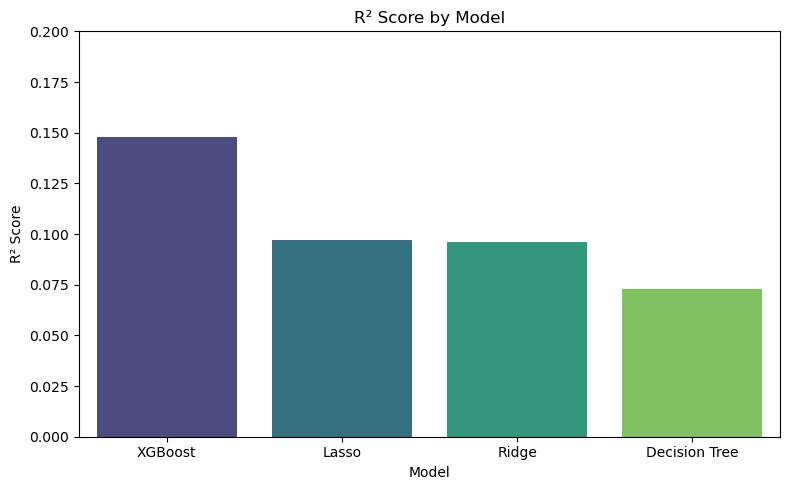

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming results_df is your dataframe from the grid search
plt.figure(figsize=(8, 5))
sns.barplot(data=results_df, x='Model', y='R²', palette='viridis')
plt.title('R² Score by Model')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.ylim(0, 0.2)
plt.tight_layout()
plt.show()

🔁 Next Phase: PCA + Clustering + Similarity-Based Recommender


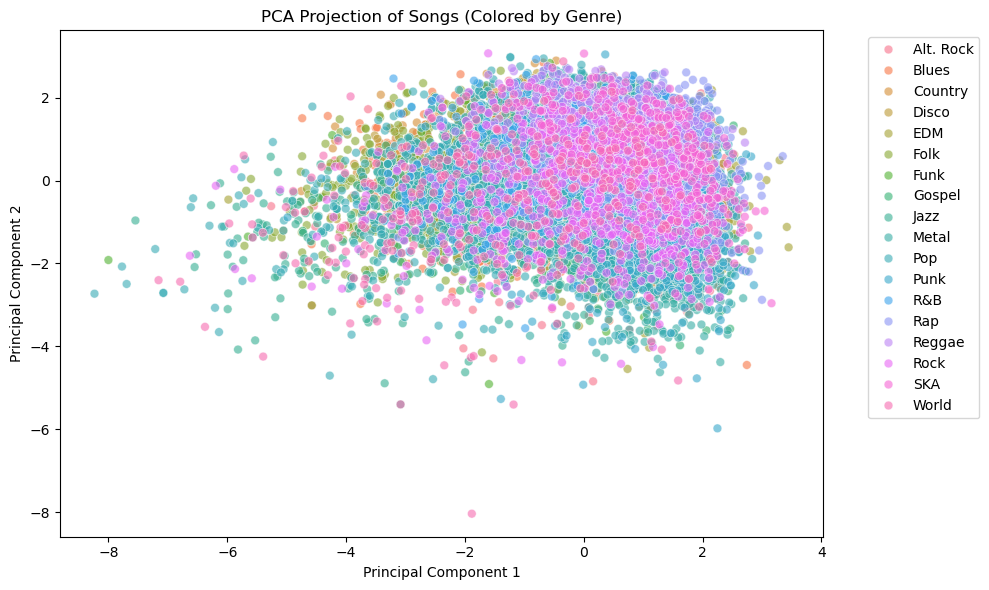

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define features for PCA
pca_features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness',
                'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo', 'Duration_min']

# Standardize features
X = df_classic_hits_clean[pca_features]
X_scaled = StandardScaler().fit_transform(X)

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
df_pca = df_classic_hits_clean.copy()
df_pca['PCA1'] = X_pca[:, 0]
df_pca['PCA2'] = X_pca[:, 1]

# Plot PCA projection colored by Genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Genre', alpha=0.6, s=40)
plt.title('PCA Projection of Songs (Colored by Genre)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

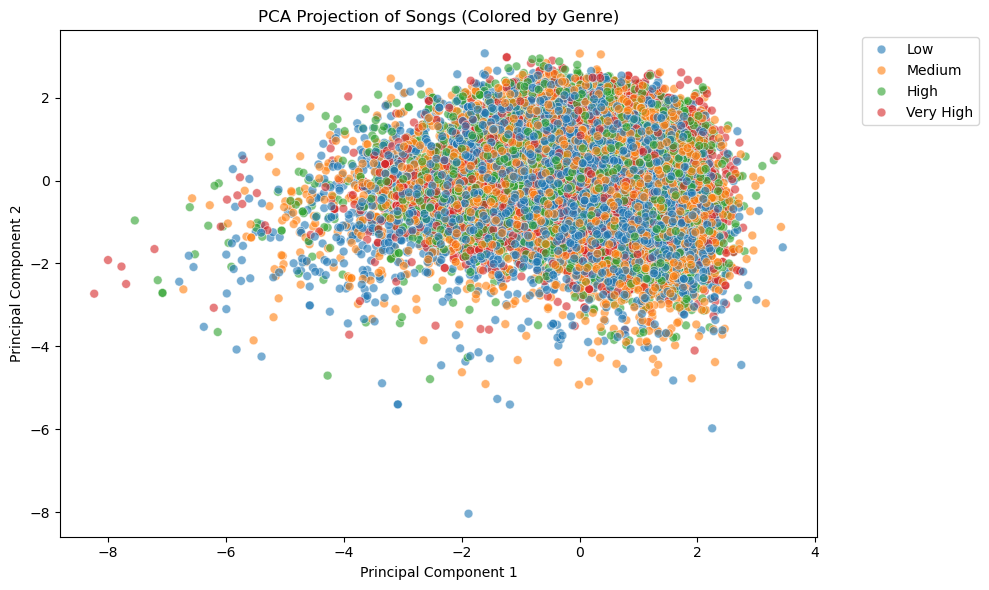

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Define features for PCA
pca_features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness',
                'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo', 'Duration_min']

# Standardize features
X = df_classic_hits_clean[pca_features]
X_scaled = StandardScaler().fit_transform(X)

# Run PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Add PCA results to dataframe
df_pca = df_classic_hits_clean.copy()
df_pca['PCA1'] = X_pca[:, 0]
df_pca['PCA2'] = X_pca[:, 1]

# Plot PCA projection colored by Genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Popularity_bin', alpha=0.6, s=40)
plt.title('PCA Projection of Songs (Colored by Genre)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

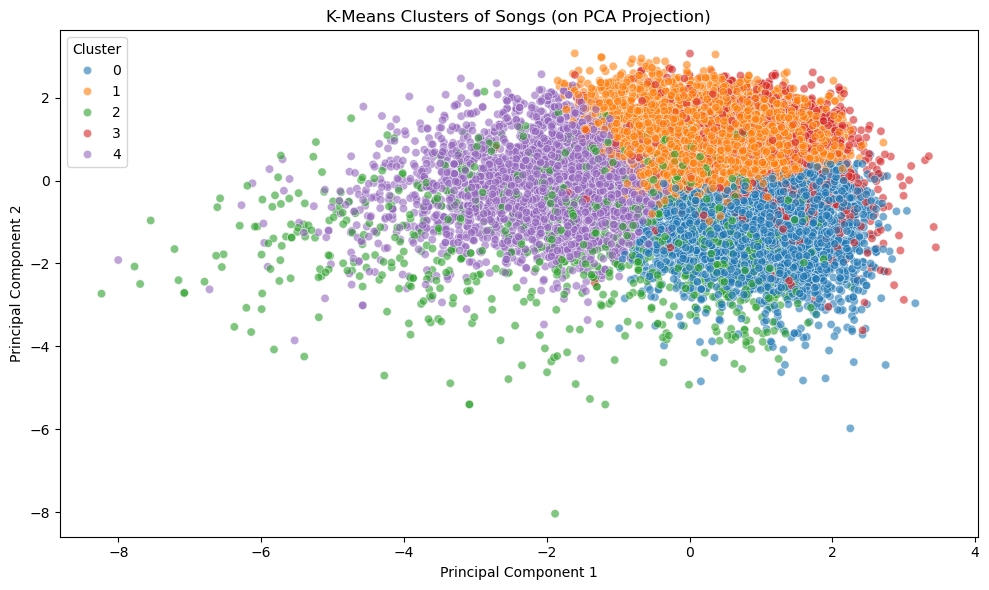

In [119]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Standardize audio features (if not already done)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness',
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness',
            'Tempo', 'Duration_min']

X = df_classic_hits_clean[features]
X_scaled = StandardScaler().fit_transform(X)

# 2. PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 3. Run KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# 4. Add cluster & PCA back to dataframe
df_clusters = df_classic_hits_clean.copy()
df_clusters['Cluster'] = clusters
df_clusters['PCA1'] = X_pca[:, 0]
df_clusters['PCA2'] = X_pca[:, 1]

# 5. Plot PCA projection with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.6)
plt.title('K-Means Clusters of Songs (on PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [120]:
df_clusters.groupby('Cluster')[features].mean().round(2)

Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.45    0.82         0.07          0.07              0.04   
1                0.69    0.67         0.06          0.20              0.02   
2                0.51    0.60         0.06          0.32              0.77   
3                0.70    0.67         0.30          0.18              0.02   
4                0.51    0.35         0.04          0.64              0.03   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.27     0.44     -6.21  132.79          4.15  
1            0.16     0.77     -8.62  117.12          3.97  
2            0.20     0.48    -11.67  120.54          5.06  
3            0.24     0.58     -7.63  116.74          3.95  
4            0.19     0.44    -12.67  113.19          3.99

In [121]:
df_clusters.groupby('Cluster')['Genre'].value_counts(normalize=True).unstack().fillna(0).round(2)

Genre    Alt. Rock  Blues  Country  Disco   EDM  Folk  Funk  Gospel  Jazz  \
Cluster                                                                     
0             0.11   0.02     0.01   0.01  0.10  0.00  0.01    0.04  0.01   
1             0.05   0.03     0.05   0.10  0.03  0.02  0.05    0.01  0.01   
2             0.06   0.05     0.00   0.05  0.11  0.02  0.05    0.00  0.15   
3             0.02   0.01     0.00   0.01  0.05  0.02  0.02    0.01  0.00   
4             0.02   0.06     0.12   0.03  0.00  0.13  0.01    0.04  0.07   

Genre    Metal   Pop  Punk   R&B   Rap  Reggae  Rock   SKA  World  
Cluster                                                            
0         0.20  0.18  0.15  0.01  0.02    0.00  0.08  0.04   0.01  
1         0.01  0.34  0.02  0.08  0.03    0.06  0.05  0.04   0.01  
2         0.10  0.17  0.06  0.01  0.01    0.01  0.06  0.02   0.09  
3         0.01  0.20  0.03  0.02  0.46    0.11  0.00  0.02   0.01  
4         0.01  0.33  0.01  0.06  0.01    0.01  0.06  0.00   0.04

In [122]:
df_clusters.groupby('Cluster')['Popularity_bin'].value_counts(normalize=True).unstack().fillna(0).round(2)

Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.23    0.27  0.25       0.26
1               0.22    0.24  0.26       0.28
2               0.38    0.31  0.20       0.12
3               0.15    0.22  0.31       0.32
4               0.32    0.27  0.22       0.19


📆 Decade: 1960


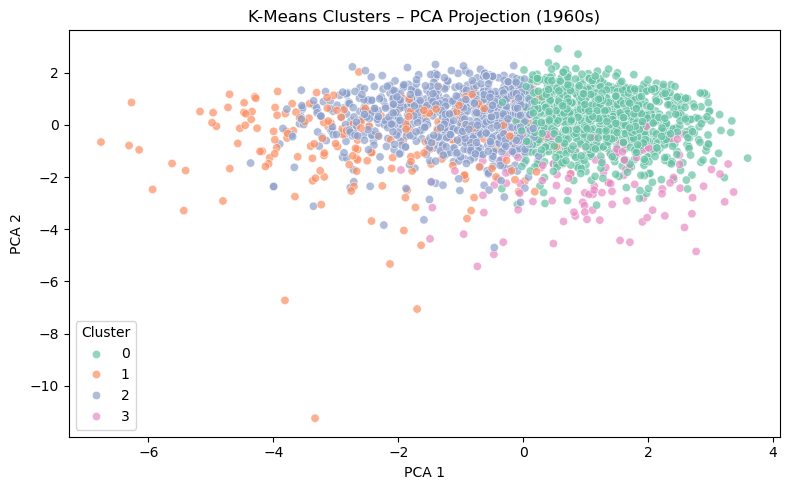

         Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.61    0.63         0.05          0.33              0.05   
1                0.47    0.32         0.05          0.72              0.78   
2                0.50    0.31         0.04          0.72              0.02   
3                0.55    0.62         0.19          0.48              0.06   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.17     0.75     -8.63  124.25          3.14  
1            0.19     0.41    -16.46  114.05          5.35  
2            0.19     0.47    -13.28  113.19          3.75  
3            0.60     0.64     -9.81  128.47          3.91  

🎵 Popularity Distribution by Cluster:
Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.24    0.29  0.23

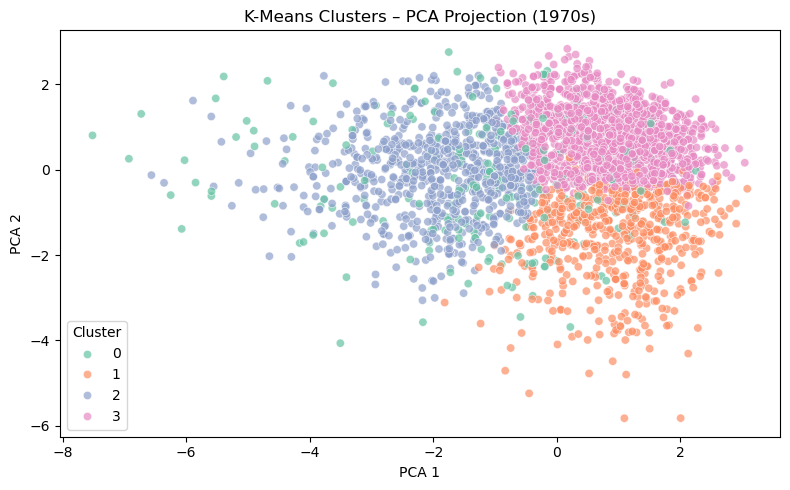

         Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.54    0.55         0.05          0.32              0.74   
1                0.46    0.78         0.09          0.16              0.04   
2                0.50    0.37         0.04          0.60              0.03   
3                0.70    0.65         0.06          0.20              0.03   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.18     0.62    -13.11  117.19          5.46  
1            0.32     0.59     -7.64  138.79          4.10  
2            0.19     0.46    -12.78  113.39          4.01  
3            0.14     0.80     -9.60  114.33          4.28  

🎵 Popularity Distribution by Cluster:
Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.49    0.30  0.14

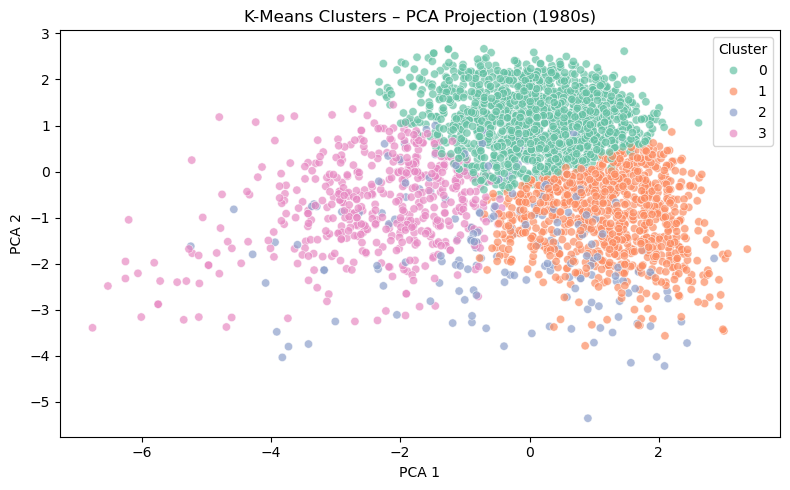

         Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.71    0.68         0.07          0.15              0.02   
1                0.43    0.84         0.08          0.08              0.03   
2                0.49    0.69         0.06          0.18              0.73   
3                0.53    0.35         0.04          0.58              0.05   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.15     0.78     -9.39  117.63          4.31  
1            0.28     0.47     -7.31  131.96          3.87  
2            0.20     0.49    -10.41  127.44          4.70  
3            0.18     0.37    -13.21  111.31          4.10  

🎵 Popularity Distribution by Cluster:
Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.22    0.23  0.27

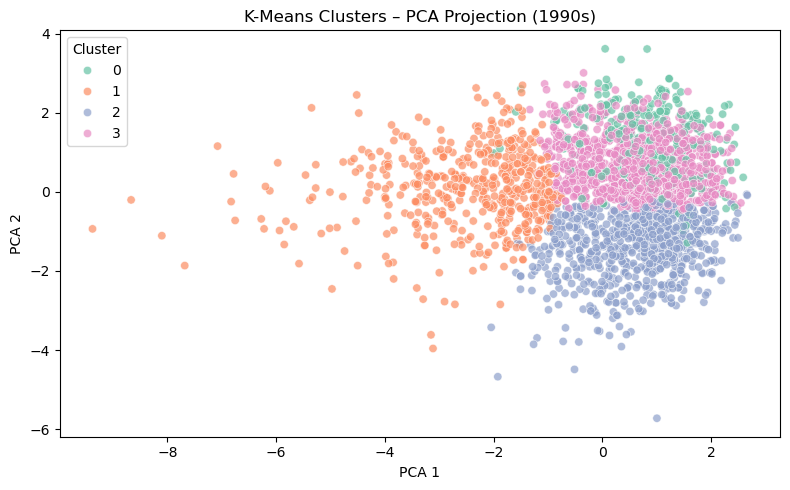

         Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.74    0.67         0.30          0.16              0.01   
1                0.51    0.36         0.04          0.55              0.12   
2                0.42    0.83         0.07          0.05              0.12   
3                0.68    0.72         0.06          0.13              0.03   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.23     0.61     -7.95  112.18          4.04  
1            0.17     0.33    -12.24  111.01          4.56  
2            0.25     0.42     -6.41  135.25          4.34  
3            0.17     0.70     -7.51  113.99          3.89  

🎵 Popularity Distribution by Cluster:
Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.11    0.21  0.35

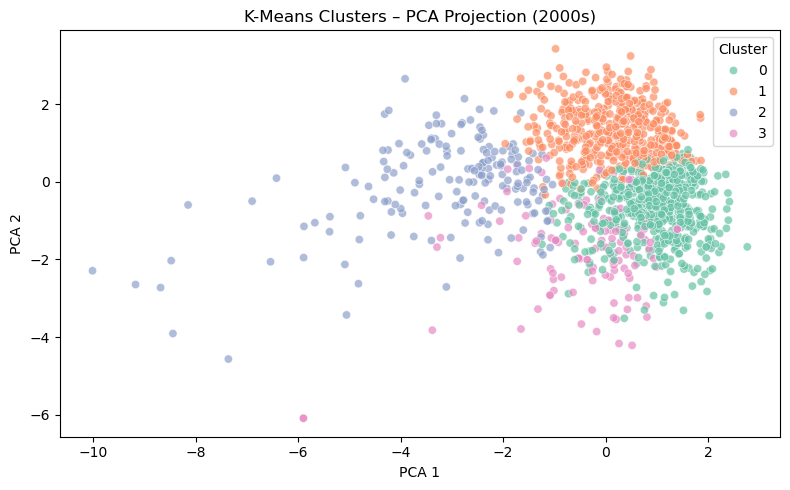

         Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.43    0.87         0.09          0.03              0.03   
1                0.69    0.74         0.15          0.13              0.01   
2                0.51    0.39         0.05          0.61              0.11   
3                0.47    0.82         0.07          0.07              0.70   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.27     0.40     -4.81  133.17          4.18  
1            0.19     0.69     -6.02  112.75          4.01  
2            0.17     0.39    -11.38  112.40          4.66  
3            0.22     0.41     -6.86  123.40          6.22  

🎵 Popularity Distribution by Cluster:
Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.17    0.23  0.27

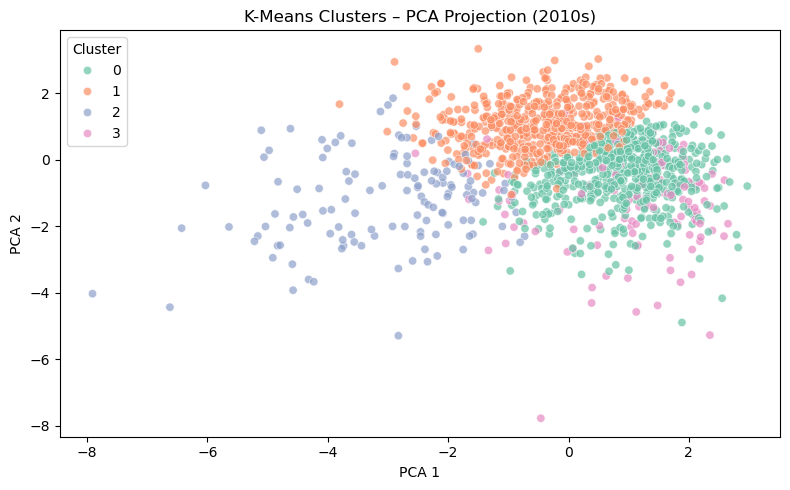

         Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.51    0.82         0.08          0.05              0.03   
1                0.72    0.71         0.14          0.13              0.01   
2                0.53    0.45         0.10          0.59              0.08   
3                0.60    0.85         0.08          0.05              0.74   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.24     0.33     -4.61  131.34          4.28  
1            0.18     0.59     -5.88  119.55          3.65  
2            0.21     0.34     -9.83  112.11          4.07  
3            0.25     0.37     -5.65  129.45          4.90  

🎵 Popularity Distribution by Cluster:
Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.17    0.29  0.30

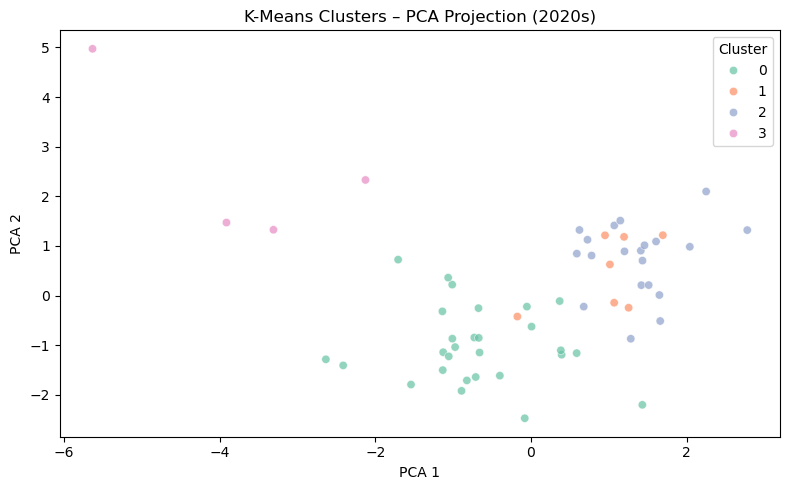

         Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.77    0.59         0.21          0.16              0.01   
1                0.61    0.85         0.14          0.21              0.65   
2                0.57    0.83         0.08          0.08              0.01   
3                0.56    0.28         0.08          0.75              0.03   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.16     0.37     -7.54  111.34          3.19  
1            0.17     0.43     -6.19  128.08          3.40  
2            0.28     0.49     -4.07  128.78          4.02  
3            0.13     0.34    -13.65  132.64          6.05  

🎵 Popularity Distribution by Cluster:
Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.04    0.18  0.46

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness',
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness',
            'Tempo', 'Duration_min']

decades = sorted(df_classic_hits_clean['Decade'].unique())
clustered_decade_dfs = []  # ✅ Collect all processed decades

for decade in decades:
    print(f"\n📆 Decade: {decade}")
    df_decade = df_classic_hits_clean[df_classic_hits_clean['Decade'] == decade].copy()
    X = df_decade[features]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    df_decade['PCA1'] = X_pca[:, 0]
    df_decade['PCA2'] = X_pca[:, 1]

    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    df_decade['Cluster'] = kmeans.fit_predict(X_scaled)

    # ⬇️ Add this to collect each processed decade
    clustered_decade_dfs.append(df_decade)

    # Your visualizations and summaries...
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df_decade, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', alpha=0.7)
    plt.title(f'K-Means Clusters – PCA Projection ({decade}s)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(title='Cluster')
    plt.tight_layout()
    plt.show()

    print(df_decade.groupby('Cluster')[features].mean().round(2))
    print("\n🎵 Popularity Distribution by Cluster:")
    print(df_decade.groupby('Cluster')['Popularity_bin'].value_counts(normalize=True).unstack().fillna(0).round(2))

## Recommender System

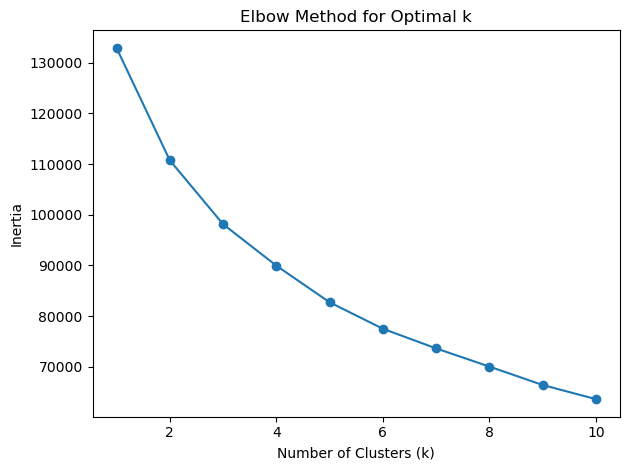

In [135]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness',
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness', 'Tempo', 'Duration_min']

X = df_classic_hits_clean[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.tight_layout()
plt.show()

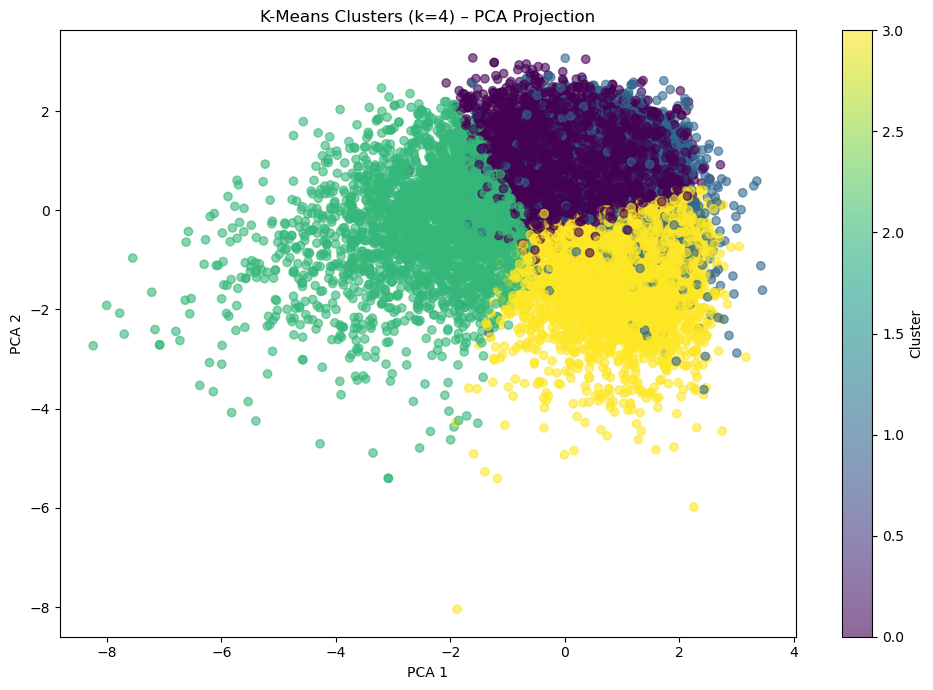

In [155]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select audio features
features = ['Danceability', 'Energy', 'Speechiness', 'Acousticness',
            'Instrumentalness', 'Liveness', 'Valence', 'Loudness',
            'Tempo', 'Duration_min']

X = df_classic_hits_clean[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_classic_hits_clean["Cluster"] = kmeans.fit_predict(X_scaled)

# PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_classic_hits_clean["Cluster"], cmap="viridis", alpha=0.6)
plt.title("K-Means Clusters (k=4) – PCA Projection")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(scatter, label="Cluster")
plt.tight_layout()
plt.show()

In [137]:
cluster_audio_summary = df_classic_hits_clean.groupby('Cluster')[features].mean().round(2)
print(cluster_audio_summary)

         Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
Cluster                                                                      
0                0.69    0.67         0.06          0.20              0.05   
1                0.70    0.67         0.30          0.18              0.02   
2                0.50    0.33         0.04          0.67              0.13   
3                0.44    0.82         0.07          0.07              0.12   

         Liveness  Valence  Loudness   Tempo  Duration_min  
Cluster                                                     
0            0.16     0.76     -8.74  117.14          3.95  
1            0.24     0.58     -7.62  116.55          3.94  
2            0.19     0.42    -13.40  112.89          4.17  
3            0.26     0.43     -6.47  132.36          4.31  


In [138]:
genre_distribution = (
    df_classic_hits_clean.groupby('Cluster')['Genre']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .round(2)
)
print(genre_distribution)

Genre    Alt. Rock  Blues  Country  Disco   EDM  Folk  Funk  Gospel  Jazz  \
Cluster                                                                     
0             0.05   0.03     0.05   0.10  0.03  0.02  0.05    0.01  0.01   
1             0.02   0.01     0.00   0.01  0.05  0.02  0.02    0.02  0.00   
2             0.02   0.06     0.10   0.03  0.00  0.13  0.01    0.04  0.10   
3             0.11   0.02     0.01   0.01  0.12  0.00  0.01    0.03  0.01   

Genre    Metal   Pop  Punk   R&B   Rap  Reggae  Rock   SKA  World  
Cluster                                                            
0         0.02  0.34  0.03  0.08  0.03    0.06  0.05  0.04   0.02  
1         0.01  0.19  0.03  0.02  0.45    0.11  0.00  0.02   0.01  
2         0.01  0.31  0.01  0.05  0.01    0.01  0.06  0.00   0.06  
3         0.20  0.17  0.14  0.01  0.02    0.00  0.08  0.03   0.02  


In [139]:
popularity_dist = (
    df_classic_hits_clean.groupby('Cluster')['Popularity_bin']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .round(2)
)
print(popularity_dist)

Popularity_bin   Low  Medium  High  Very High
Cluster                                      
0               0.23    0.25  0.25       0.27
1               0.16    0.22  0.31       0.32
2               0.34    0.27  0.21       0.17
3               0.24    0.27  0.24       0.25


In [143]:
def recommend_songs(song_name, df, feature_cols, track_col="Track", num_recommendations=5):
    # Get the cluster of the input song
    song_cluster = df[df[track_col] == song_name]["Cluster"].values[0]

    # Filter songs from the same cluster and reset index
    same_cluster = df[df["Cluster"] == song_cluster].reset_index(drop=True)

    # Get the index of the input song within the same_cluster subset
    song_index = same_cluster[same_cluster[track_col] == song_name].index[0]

    # Compute cosine similarity on selected features
    features_matrix = same_cluster[feature_cols]
    similarity = cosine_similarity(features_matrix, features_matrix)

    # Get top similar songs (excluding the song itself)
    similar_indices = np.argsort(similarity[song_index])[::-1][1:num_recommendations+1]
    recommendations = same_cluster.iloc[similar_indices][[track_col, "Artist", "Year"]]

    return recommendations

In [146]:
recommend_songs("Bohemian Rhapsody", df_classic_hits_clean, features)

Track                        Artist  Year
1834    Jesus To A Child                George Michael  1996
1497        Lost In Love                    Air Supply  1980
1821         Lost In You  Garth Brooks as Chris Gaines  1999
1089          Holy Ghost                   Kim Burrell  2005
2136  For The Good Times                     Ray Price  1971

In [152]:
df_classic_hits_clean[df_classic_hits_clean['Track'] == "Bohemian Rhapsody"][features]


Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
9069         0.391   0.402       0.0539         0.289               0.0   

      Liveness  Valence  Loudness    Tempo  Duration_min  
9069     0.243    0.228    -9.961  143.879           5.9

In [153]:
df_classic_hits_clean[df_classic_hits_clean['Track'] == "Lost In Love"][features]


Danceability  Energy  Speechiness  Acousticness  Instrumentalness  \
6694          0.45   0.465       0.0413           0.3               0.0   

      Liveness  Valence  Loudness    Tempo  Duration_min  
6694     0.132    0.342    -7.034  103.522           4.1

In [156]:
df_classic_hits_clean.to_csv("clean_clustered_songs.csv")
